<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание-для-Junior-DS-по-разработке-PD-модели" data-toc-modified-id="Домашнее-задание-для-Junior-DS-по-разработке-PD-модели-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашнее задание для Junior DS по разработке PD модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li></ul></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Первычный-анализ" data-toc-modified-id="Первычный-анализ-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Первычный анализ</a></span></li><li><span><a href="#Обработка-пропусков,-выбросов-и-дубликатов" data-toc-modified-id="Обработка-пропусков,-выбросов-и-дубликатов-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Обработка пропусков, выбросов и дубликатов</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Баланс <em>классов</em></a></span></li><li><span><a href="#Обработаем-Выбросы-в-выборках-без-фин-отчетности-и-с-фин-отчетностью" data-toc-modified-id="Обработаем-Выбросы-в-выборках-без-фин-отчетности-и-с-фин-отчетностью-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Обработаем Выбросы в выборках без фин отчетности и с фин отчетностью</a></span><ul class="toc-item"><li><span><a href="#Выбросы-в-выборке-с-фин-отчетностью" data-toc-modified-id="Выбросы-в-выборке-с-фин-отчетностью-1.1.5.1"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Выбросы в выборке с фин отчетностью</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Отбор-признаков" data-toc-modified-id="Отбор-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Отбор признаков</a></span><ul class="toc-item"><li><span><a href="#WOE" data-toc-modified-id="WOE-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>WOE</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-результата" data-toc-modified-id="Выгрузка-результата-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Выгрузка результата</a></span></li></ul></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

# Домашнее задание для Junior DS по разработке PD модели

<b>Задание:</b> Необходимо разработать модель предсказания дефолта. Даны финансовые данные 32 395 компаний (выручка, активы, пассивы и т.д). Результат будет оцениваться на скрытой выборке из 200 компаний по метрике качества accuracy_score

<b>Цель задания</b> научиться / показать знания в разработке моделей оценки риска - probability of default. Задание приближено к реальному, данные синтетические. Лидерборд для оценки собственного решения и геймификации процесса обучения. Первое место в лидерборде не является целью. Цель - правильно разработанная модель, удовлетворяющая требованиям банковской системы. В случае возникновения вопросов, сотрудники блока Риски готовы проконсультировать и дать обратную связь на модель (телеграм чат).

<b>Метрика качества</b> accuracy_score вычисляется, как ( True positive + True negative ) / Total. Если сабмит-файл, неправильного формата или неверное количество строк, метрика будет = 0.

### Импортируем библиотеки

In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from scipy import stats 
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [74]:
!pip install pdpbox

## Обработка данных


### Загрузка данных

In [75]:
train_df = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv', sep=';')
test_df = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv', sep=';')
desc_df = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv', sep=';')

In [76]:
# Тута технический код на него не надо смотреть
class Grapher:
    def __init__(self, 
                 train, test=[], target_col = 'default_12m',
                 figsize = (10,5), target_colors = {0:'gray',1:'red'}
                 ):         

        self.df_original = (train,test)
        self.target = train[target_col]
        self.df = train.drop(columns=[target_col])
        self.dfs_by_target = [train[train[target_col]==target_value] for target_value in train[target_col].unique()]

        self.test = test

        self.plt_figsize = figsize
        self.plt_colored_target = self.target.map(target_colors)
        self.fplt_dims = {self.scatter:2,
                          self.scatter3d:3,
                          self.hist:1}

    def show_cyclic(self,fplt):
        '''
        shows #[n-constant] fplt plots of df with cyclic change in the dimensions
        Example:
            g = Grapher( pd.DataFrame({a:[],b:[],c:[]}) )
            g.show_cyclic(g.scatter) 
            -> 
            prints scatter plots with cyclic change in the dimensions:
            g.scatter(a,b);g.scatter(b,c);g.scatter(c,a)
        !: 
            it will show #[n-constant] graphics (it is almost always less than #qty of df columns)
        '''

        n=self.fplt_dims[fplt]
        index_start = 0
        for i in range(len(self.df.columns)-n):
            fplt(*(self.df.columns[0+i:n+i]))

    
    def show_all(self,fplt):
        '''
        shows all possible fplt plots of df
        Example:
            g = Grapher( pd.DataFrame({a:[],b:[],c:[]}) )
            g.show_all(g.scatter) 
            -> 
            prints all possible scatter plots:
            g.scatter(a,b);g.scatter(a,c);g.scatter(b,c)
        !: 
            if many df columns then there are too many graphs to show
        '''

        from itertools import combinations as combi
        n=self.fplt_dims[fplt]

        for dims in combi(self.df.columns,n):
            fplt(*dims)

    def show_separate(self, fplt):
        '''
        should show 3 fplt plots side by side: 
        {{default+alive,default,alive}}
        In general should show n+1 fplt plots side by side:
        {{everething, target_group_1, target_group_2, ... , target_group_n}}
        '''
        # all = self.df
        # dead = all[self.target == 1]
        # alive = all[all[self.target != 1]

        # all = Grapher(train=all)
        # dead = Grapher(train=dead)
        # alive = Grapher(train=alive)

        # all.scatter3d()
        # dead.scatter3d()
        # alive.scatter3d()
        pass
    
    def scatter(self,
                x_name = 'bus_age', y_name = 'ul_capital_sum',
                alpha = 0.3,
                xscale = 'linear',
                yscale = 'linear'
                ):
        
        fig, ax = plt.subplots(figsize=self.plt_figsize)

        ax.scatter(
                x = self.df[x_name], 
                y = self.df[y_name], 
                c = self.plt_colored_target,
                alpha = alpha
                )
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        plt.xlabel(x_name)
        plt.ylabel(y_name)

        plt.show()

    def scatter3d(self,
                  x_name='ul_capital_sum',
                  y_name='ul_founders_cnt',
                  z_name='bus_age',
                  alpha = 0.3,
                  xscale = 'linear',
                  yscale = 'linear',
                  zscale = 'linear'):
        
        fig = plt.figure(figsize=self.plt_figsize)
        ax = fig.add_subplot(projection='3d')

        ax.scatter(self.df[x_name], 
                   self.df[y_name], 
                   self.df[z_name], 
                   c = self.plt_colored_target,
                   alpha = alpha)
        
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        ax.set_zscale(zscale)
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel(z_name)

        plt.show()

    def hist(self,
             x_name='ar_revenue',
             n_bins = 30,
             alpha = 0.3,
             xscale = 'linear',):
        
        fig, ax =  plt.subplots(figsize=self.plt_figsize)

        
        # for i,color in self.plt_colored_target.items():
        dim_0 = self.df[self.target == 0][x_name]
        dim_1 = self.df[self.target != 0][x_name]
        ax.hist(dim_0, n_bins, stacked=True, density=False,color='Gray')
        ax.hist(dim_1, n_bins, stacked=True, density=False,color='Red')
        ax.set_title(x_name)


        # ax.set_ylabel('Scores')
        # ax.set_title('Scores by group and gender')
        # ax.legend()

        plt.show()

    def hist3d(self, n_bins = 10):
        pass

df_ab = train_df.iloc[:,:24]
df_ab['default_12m'] = train_df['default_12m'] 

size = (6,3)
g = Grapher(train = df_ab, figsize=size)
gt = Grapher(train = df_ab[df_ab.default_12m == 0], figsize=size)
gm = Grapher(train = df_ab[df_ab.default_12m != 0], figsize=size)

In [77]:
def benefit_plot(design_matrix,target,
                 proba,thr_counts,debt_for_target,
                 r=0.05,lgd= 0.2):


    thr = np.linspace(0,1,thr_counts)
    plt.subplots(figsize = (20,5))

    benefit = []
    c_acceptance_rate = []
    for t in thr:
        c_acceptance_rate += [(len(proba) - np.sum((proba>t)*1.))/len(proba)]
        TN_sum = 0
        FN_sum = 0
        for y,prob,debt,lgd_el in zip(target,proba,debt_for_target,lgd):
                e_fp = r*debt
                e_fn = lgd_el*debt
                if (prob > t)*1. == 0 and y ==0:
                    TN_sum += e_fp
                elif (prob > t)*1. == 0 and y == 1:
                    FN_sum += e_fn
        benefit += [(TN_sum - FN_sum,t)]
            
    
    fpr,tpr,_ = roc_curve(target,proba)
    gini = 2 * roc_auc_score(target,proba) - 1
    max_benefit_params = sorted(benefit,reverse=True, key = lambda x: x[0])[0]
    print('gini',np.round(gini,2))
    print('max benefit',max_benefit_params[0])
    print('best_threshold',max_benefit_params[1])
    benefit_for_plot = [x[0] for x in benefit]
    plt.plot(thr,benefit_for_plot)
    plt.plot(c_acceptance_rate[np.argmax(benefit_for_plot)],
            np.max(benefit_for_plot))
    plt.title('benefit curve')
    plt.xlabel('threshold')
    plt.ylabel('benefit')
    plt.grid()
    plt.show()

$\text{Скоринговоый балл в линейном масштабе j-итого признака} = -(WOE_{j}*b_{j}+\frac{b_{0}}{n})*R+\frac{A}{n}$ 

где WOEj — значение WOE для каждой j-ой категории сгруппированной переменной, n — количество независимых переменных в уравнении регрессии, b0 — константа, bi — коэффициент регрессии для i-ой переменной.

In [78]:
def scoring_map(model,selected_columns,frame):
    """
    D — количество баллов, удваивающее шансы
    С - маштаб
    B — значение на шкале баллов, в которой соотношение шансов составляет С:1
    R — множитель
    А — смещение
    
    Литература:
    https://naukovedenie.ru/PDF/180EVN214.pdf
    """
    # Задаем константы
    D = 40
    C = 72
    B = 600
    R = D/np.log(2)
    A = B - R*np.log(C)
    coef_b = model.coef_
    intercept_b0 = model.intercept_
    number_of_features = len(selected_columns)
    # рассчитываем скоринговый балл
    for num,column in enumerate(selected_columns):
        column = column[4:]
        name_woe = 'WoE_' + str(column)
        woe = calc_woe_iv(frame, column, 'default_12m')[0][['value',name_woe]]
        woe['scoring_points'] = -(woe[name_woe]*(coef_b[0][num])+np.abs(intercept_b0/number_of_features))*R+(A/number_of_features)
        if column in ['cut_ogrn_age','cut_ul_staff_range','cut_frac_comer_exp']:
            display(woe.sort_values(by = 'value',ascending = True))

### Первичный анализ

In [79]:
train_df.head(10)

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,0.0,1198000.0,0.0,7240000.0,4988000.0,2252000.0,0.0,255000.0,1198000.0,663000.0,15872000.0,0.0,11349000.0,4523000.0,0.0,198,136,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,135,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,0.0,1919000.0,0.0,4245000.0,4082000.0,163000.0,0.0,25000.0,1919000.0,2219000.0,3652000.0,0.0,3652000.0,0.0,0.0,185,139,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,0.0,711000.0,0.0,8950000.0,8606000.0,344000.0,0.0,492000.0,711000.0,12439000.0,1279000.0,0.0,0.0,1279000.0,0.0,220,138,27,27,27,[1-100],10000.0,2,0,0,0,0
5,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,5,5,5,[1-100],350000.0,1,0,0,0,0
6,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266,27,7,7,7,[1-100],35000.0,3,0,0,0,0
7,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,31,30,30,30,[1-100],10000.0,2,0,0,0,0
8,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,27,26,26,26,[1-100],10000.0,1,0,0,0,0
9,40,125432000.0,122655000.0,122655000.0,0.0,0.0,2777000.0,-63000.0,2714000.0,579000.0,0.0,2135000.0,0.0,24680000.0,8263000.0,16417000.0,0.0,106000.0,2135000.0,11267000.0,11912000.0,0.0,13000.0,11899000.0,0.0,170,132,15,15,15,(100-500],10000.0,2,0,0,0,0


Рассмотрим описание колонок во второй таблице:

In [80]:
desc_df.head(50)

,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Profit from sales (at the end of the last year),Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Balance of income and expenses (at the end of ...,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Gross Profit (end of last year),Валовая прибыль (на конец последнего года)
8,ar_taxes,Current income tax (at the end of the last year),Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Other income and expenses (at the end of the l...,Прочие доходы и расходы (на конец последнего г...


Признаки отражают финансовую отчетность компании. На основе этих признаков мы сможем расчитать финансовые мультипликаторы, которые будут яснее отображать финансовую устойчивость компании, а, соотсветственно, и лучше демонстрировать вероятность дефолта. 

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     32395 non-null  int64  
 1   ar_revenue                    17250 non-null  float64
 2   ar_total_expenses             17250 non-null  float64
 3   ar_sale_cost                  17250 non-null  float64
 4   ar_selling_expenses           17250 non-null  float64
 5   ar_management_expenses        17250 non-null  float64
 6   ar_sale_profit                17250 non-null  float64
 7   ar_balance_of_rvns_and_expns  17250 non-null  float64
 8   ar_profit_before_tax          17250 non-null  float64
 9   ar_taxes                      17250 non-null  float64
 10  ar_other_profit_and_losses    17250 non-null  float64
 11  ar_net_profit                 17250 non-null  float64
 12  ab_immobilized_assets         17250 non-null  float64
 13  a

У нас есть 1 категориальный признак. Это количество сотрудников.
Можем закодировать через LabelEncoding, тк видна четкая иерархия. 

In [82]:
train_df['ul_staff_range'].value_counts()

[1-100]      29281
(100-500]     2757
> 500          357
Name: ul_staff_range, dtype: int64

In [83]:
le = preprocessing.LabelEncoder()
le.fit(train_df['ul_staff_range'])
train_df['ul_staff_range'] = le.transform(train_df['ul_staff_range'])
test_df['ul_staff_range'] = le.transform(test_df['ul_staff_range'])

Рассмотрим уникальные значения у каждого признака.

In [84]:
train_df.nunique()

record_id                       32395
ar_revenue                      12893
ar_total_expenses               12779
ar_sale_cost                    12664
ar_selling_expenses              1994
ar_management_expenses           1093
ar_sale_profit                   7163
ar_balance_of_rvns_and_expns     5063
ar_profit_before_tax             6526
ar_taxes                         2247
ar_other_profit_and_losses        595
ar_net_profit                    6231
ab_immobilized_assets            3498
ab_mobile_current_assets        11222
ab_inventory                     9143
ab_accounts_receivable           8283
ab_other_current_assets          1210
ab_cash_and_securities           3677
ab_losses                        6175
ab_own_capital                   9090
ab_borrowed_capital             10261
ab_long_term_liabilities         2294
ab_short_term_borrowing          4896
ab_accounts_payable              8797
ab_other_borrowings              1437
bus_age                           315
ogrn_age    

Видим, что признак ul_systematizing_flg имеет 1 уникальное значение. Удалим его. Также удалим record_id так как он не несет информативности для нашей задачи.

In [85]:
train_df = train_df.drop(['record_id','ul_systematizing_flg'],axis = 1)

### Обработка пропусков, выбросов и дубликатов

Мы предполагаем что в train_df пропуски являются частью *предметной области*. Компании с пропусками просто не имеют/не предоставили своих бухгалтерских отчетов.

Пропуски в train_df составляют 46% выборки, а в test_df 59% выборки. Более того, в train_df 2% дефолтов произошло с компаниями без пропусков, а 4% дефолтов с компаниями с пропусками. Это слишком большая потеря данных.

Также заметим, что можно выделить две примерно одинаковые подвыборки: с финансовой отчетностью и без. Так как эти подвыборки очень различаются по своим вводным, будем рассматривать их раздельно.


In [86]:
target = train_df['default_12m']

print(f'{np.round((1-len(train_df.dropna()) / len(train_df)) * 100, 3)}% строк в train_df имеют пропуски')
print(f'{np.round((1-len(test_df.dropna()) / len(test_df))* 100, 3)}% строк в test_df имеют пропуски')

print()

print(f'{np.round((train_df.dropna()["default_12m"].sum() / train_df["default_12m"].count()) * 100, 3)}\
% строк c пропусками из train_df объявили дефолт')

a = pd.concat([train_df, train_df.dropna()]).drop_duplicates(keep=False)['default_12m']
print(f'{np.round((a.sum()/train_df["default_12m"].count())*100, 3)}% строк без пропусков из train_df объявили дефолт')
print(f'{np.round((target.sum()/train_df["default_12m"].count())*100, 3)}% всего строк из train_df объявили дефолт')

46.751% строк в train_df имеют пропуски
59.0% строк в test_df имеют пропуски

2.457% строк c пропусками из train_df объявили дефолт
2.806% строк без пропусков из train_df объявили дефолт
6.455% всего строк из train_df объявили дефолт


Подвыборки в трейне:

In [87]:
pd.DataFrame(
    train_df
    .isnull()
    .T
    .sum(), columns = ["Кол-во пропусков"]
    )\
    .reset_index()\
    .groupby("Кол-во пропусков")\
    .count()

,index
Кол-во пропусков,
0,17250
24,15145


Здесь мы можем увидеть, что в нашей выборке есть 2 подгруппы: 1-ая имеет пропуски во всех признаках фин отчетности, а у 2-ой эти признаки присутсвуют 

In [88]:
sum_null_in_object = pd.DataFrame(train_df.isnull().T.sum(),columns = ['count_nans'])
ids_with_24_nans = sum_null_in_object.query('count_nans == 24').index
train_df.loc[ids_with_24_nans,:][:3]

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,default_12m
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,135,12,12,12,2,10000.0,5,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,28,28,28,2,10000.0,2,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,5,5,5,2,350000.0,1,0,0,0


Подвыборки в тесте также присутствуют:

In [89]:
pd.DataFrame(
    test_df
    .isnull()
    .T
    .sum(), columns = ["Кол-во пропусков"]
    )\
    .reset_index()\
    .groupby("Кол-во пропусков")\
    .count()

,index
Кол-во пропусков,
0,82
24,118


Существует немало компаний с одинаковыми значениями в статьях баланса. 


Будем считать эти строки дубликатами и удалим их из выборки.

In [90]:
print(f'{np.round(train_df.duplicated().sum()/len(train_df), 3)}% выборки train_df полные дубликаты')

a = pd.concat([train_df, train_df.dropna()]).drop_duplicates(keep=False)

print(f'{np.round(100 * a.iloc[:,:24].duplicated().sum()/len(train_df), 3)}\
% выборки train_df дубликаты по статьям расхода')

print(f'{np.round(100 * train_df.iloc[:,24:].duplicated().sum()/len(train_df), 3)}\
% выборки train_df дубликаты по НЕ статьям расхода')

train_df = train_df.drop_duplicates() 

0.179% выборки train_df полные дубликаты
25.739% выборки train_df дубликаты по статьям расхода
30.952% выборки train_df дубликаты по НЕ статьям расхода


Мы заметили, что в некторых статьях есть отрицательные значения. По МСФО таких статей не должно существовать. Более того, таких компаний немного и они не объявляли дефолт. Однако если выбросить все отрицательные наблюдения, то мы теряем 87% выборки. Поэтому не стоит рубить с плеча и далять все без разбора.

In [91]:
def remove_all_negs(df = train_df):
    k = df.min()
    return remove_cols_negs(df = train_df, cols=k[k<0].keys())

def remove_cols_negs(df = train_df, cols=[1*'ar_total_expenses',
                                              1*'ar_sale_cost',
                                              1*'ar_selling_expenses',
                                              1*'ar_management_expenses',
                                              0*'ar_sale_profit',
                                              0*'ar_balance_of_rvns_and_expns',
                                              0*'ar_profit_before_tax',
                                              1*'ar_taxes',
                                              0*'ar_other_profit_and_losses',
                                              0*'ar_net_profit',
                                              1*'ab_accounts_receivable',
                                              1*'ab_other_current_assets',
                                              1*'ab_losses',
                                              1*'ab_own_capital',
                                              1*'ab_long_term_liabilities',
                                              1*'ab_short_term_borrowing',
                                              1*'ab_other_borrowings']):
    for column_with_negs in cols:
        if column_with_negs == '':
            continue
        df = df[(train_df[column_with_negs]>=0) | (train_df[column_with_negs].isna())]
    return df

In [92]:
print(f'Если убрать ar_total_expenses, теряется {np.round(100-len(remove_cols_negs())/len(train_df)*100, 3)}% выборки')
print(f'Если убрать все отрицательные значения, теряется {np.round(100-len(remove_all_negs())/len(train_df)*100, 3)}% выборки')

Если убрать ar_total_expenses, теряется 7.71% выборки
Если убрать все отрицательные значения, теряется 47.352% выборки


Разделим вышезамеченные выборки с отчетностью и без. Мы видим, что разбиение по Nan значениям бинарное. Проверим также на всякий случай точно ли эти пропуски делятся по отсутствию отчетности.

In [93]:
train_df.isna().sum()

ar_revenue                      10215
ar_total_expenses               10215
ar_sale_cost                    10215
ar_selling_expenses             10215
ar_management_expenses          10215
ar_sale_profit                  10215
ar_balance_of_rvns_and_expns    10215
ar_profit_before_tax            10215
ar_taxes                        10215
ar_other_profit_and_losses      10215
ar_net_profit                   10215
ab_immobilized_assets           10215
ab_mobile_current_assets        10215
ab_inventory                    10215
ab_accounts_receivable          10215
ab_other_current_assets         10215
ab_cash_and_securities          10215
ab_losses                       10215
ab_own_capital                  10215
ab_borrowed_capital             10215
ab_long_term_liabilities        10215
ab_short_term_borrowing         10215
ab_accounts_payable             10215
ab_other_borrowings             10215
bus_age                             0
ogrn_age                            0
adr_actual_a

То же число! Невероятно!

In [94]:
train_df['ar_revenue'].isnull().sum()

10215

Делим:

In [95]:
def sep_df_byfin(df):
    df_nofin = get_df_nofin(df)
    df_fin = get_df_fin(df)
    return df_fin, df_nofin
    
def get_df_fin(df):
    
    try:
        frame = df.dropna()
        frame = frame.set_index('record_id')
    except KeyError:
        frame = df.dropna()
    return frame

def get_df_nofin(df):
    
    try:
        
        frame = pd.concat([df, df.dropna()]).drop_duplicates(keep=False)
        frame =frame.set_index('record_id')
    except KeyError:
        frame = pd.concat([df, df.dropna()]).drop_duplicates(keep=False)
    
    return frame

df_fin_train, df_no_fin_train = sep_df_byfin(df = train_df)

print(f'{np.round(100*len(df_fin_train)/len(train_df), 3)}% компаний имеют фин. отчетность в трейне')
print(f'{np.round(100*len(df_no_fin_train)/len(train_df), 3)}% компаний НЕ имеют фин. отчетность в трейне')


61.583% компаний имеют фин. отчетность в трейне
38.417% компаний НЕ имеют фин. отчетность в трейне


### Баланс *классов*

Заметим, что у классов в обоих выборках наблюдается достаточно серьезный дисбаланс. Можем обработать несколькими способами: 

*   Oversampling
*   Undersampling
* SMOTE


In [96]:
print(f'{np.round(df_fin_train["default_12m"].values.mean() * 100, 3)}% дефолт у компаний с отчетностью')
print(f'{np.round(df_no_fin_train["default_12m"].values.mean() * 100, 3)}% дефолт у компаний без отчетности')

4.739% дефолт у компаний с отчетностью
10.23% дефолт у компаний без отчетности


In [97]:
df_no_fin_train[df_no_fin_train['default_12m'] == 1]['default_12m'].sum()

1045

In [98]:
def undersampling(df):

  one_class = df[df['default_12m'] == 1]['default_12m'].sum()
  df_class_0 = df[
                 df['default_12m'] == 0
                 ]\
                 .sample(one_class, random_state=42)

  df_undersampling = df_class_0.append(
      df[
         df['default_12m'] == 1
         ]).sample(frac=1)

  return df_undersampling


def oversampling(x_train, y_train):
  x_train_sm, y_train_sm = SMOTE(random_state=12).fit_resample(x_train, y_train)
  return x_train_sm, y_train_sm 


### Обработаем Выбросы в выборках без фин отчетности и с фин отчетностью

#### Выбросы в выборке с фин отчетностью

В этом блоке мы обработаем выбросы руками, без использования готовых методов, так как такие методы срезают большую часть выборки. Принимать решение по удалению будем по принципу - если значения для класса лежат вне основной кучности, то мы их удаляем

In [99]:
def vision_outliers(frame,column,main_frame):
    """
    Функция по визуализации взаимосвязь признаков с целевой переменной
    """
    title = column
    print('Кол-во дефолтов',frame.query('default_12m == 1').shape[0])
    print('Кол-во не дефолтов',frame.query('default_12m == 0').shape[0])
    g = Grapher(frame)
    g.hist(title)
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(x= frame[title],y = frame['default_12m'])
    ax.set_ylabel('default_12m')
    ax.set_xlabel(title)
    plt.show()



Кол-во дефолтов 776
Кол-во не дефолтов 15599


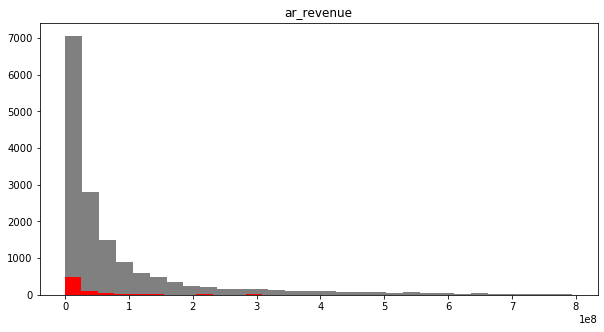

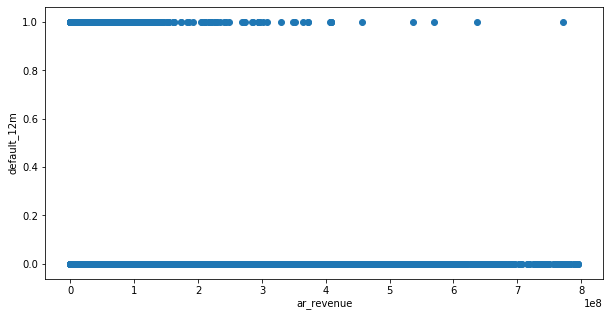

In [100]:
vision_outliers(df_fin_train,'ar_revenue',df_fin_train)
index_todel = df_fin_train.query('ar_revenue > 300000000 and default_12m == 1').index.tolist()
test_remove_outliers = df_fin_train.drop(index_todel,axis =0)

как мы можем видеть на 2 графике, в диапазоне от 0 до 300000000 сконцентривано множество объектов класса 1, а при значениях доходности > 300000000 растояние между объектами нестабильно и достатоно большое, такие объекты мы будем называть выбросами и удалять их

Кол-во дефолтов 758
Кол-во не дефолтов 15599


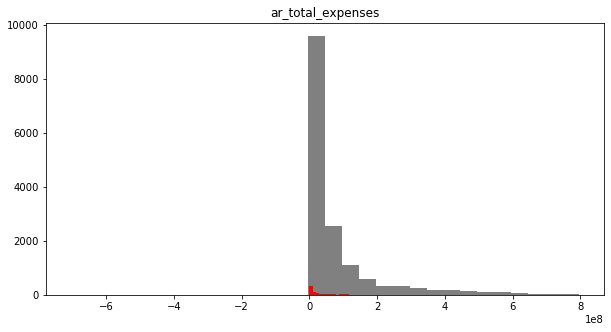

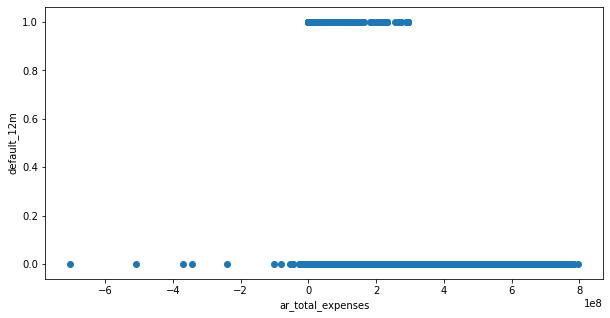

In [101]:
vision_outliers(test_remove_outliers,'ar_total_expenses',test_remove_outliers)
index_todel = test_remove_outliers.query('ar_total_expenses < 0').index.tolist()
test_remove_outliers = test_remove_outliers.drop(index_todel,axis =0)

Кол-во дефолтов 758
Кол-во не дефолтов 15582


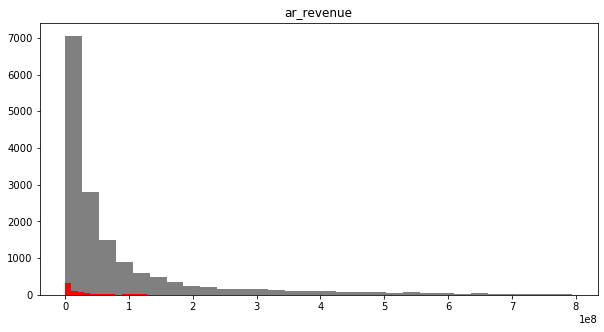

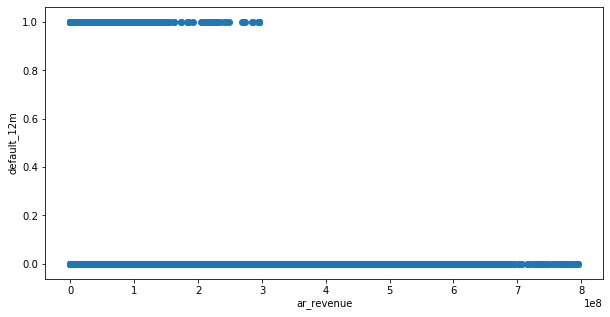

In [102]:
vision_outliers(test_remove_outliers,'ar_revenue',test_remove_outliers)

Кол-во дефолтов 758
Кол-во не дефолтов 15582


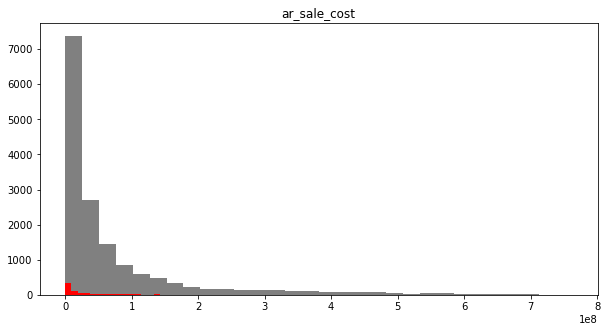

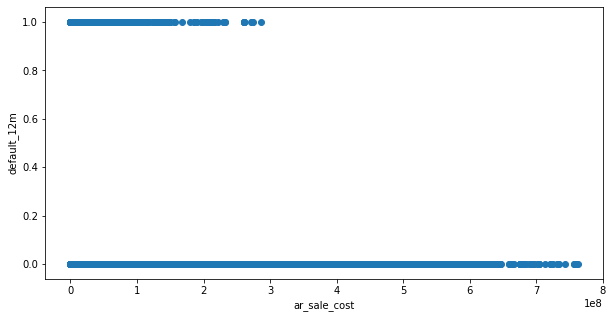

In [103]:
vision_outliers(test_remove_outliers,'ar_sale_cost',test_remove_outliers)

Кол-во дефолтов 758
Кол-во не дефолтов 15582


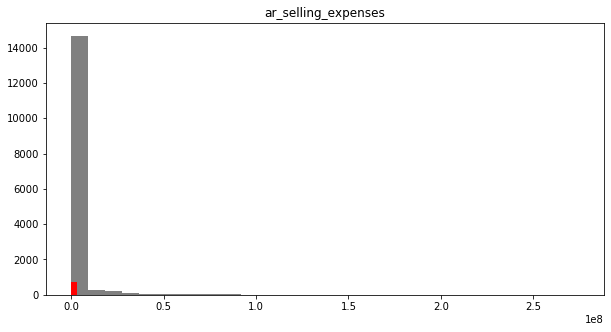

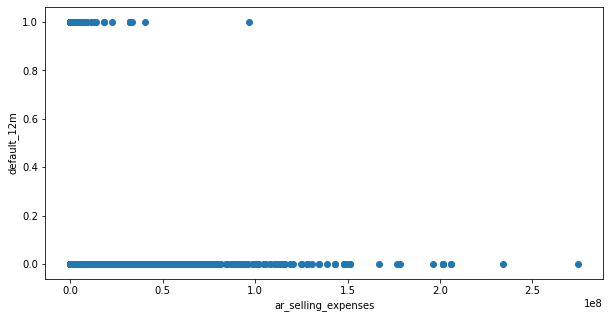

[9619, 10181, 11736, 13435, 14069, 18658, 24938, 27643, 28253, 28427, 30498, 281, 2186, 2589, 3688, 7325, 8610, 8797, 11045, 12302, 14340, 15470, 15520, 17041, 18661, 20413, 21461, 21643, 21670, 21915, 22469, 23471, 23646, 25625, 25666, 25854, 28957, 30633, 31220, 31758, 31988]


In [104]:
vision_outliers(test_remove_outliers,'ar_selling_expenses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('ar_selling_expenses > 18000000 and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('ar_selling_expenses > 120000000 and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 747
Кол-во не дефолтов 15552


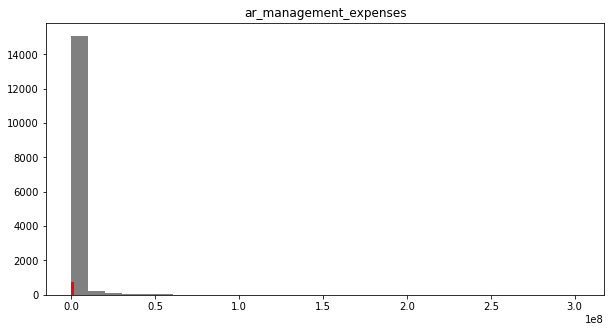

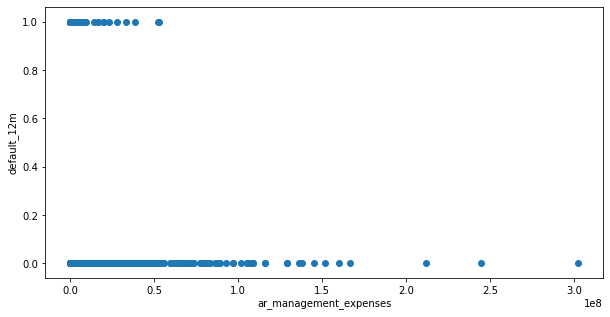

[957, 6095, 9507, 12215, 18729, 19095, 23526, 24208, 26471, 30461, 31661, 1390, 1765, 4023, 5192, 5600, 6232, 6527, 8927, 12827, 14192, 14591, 14685, 15482, 16615, 16947, 27030, 28110, 28765, 29438, 29871, 30972, 31297]


In [105]:
vision_outliers(test_remove_outliers,'ar_management_expenses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('ar_management_expenses > 14000000 and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('ar_management_expenses > 90000000 and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 736
Кол-во не дефолтов 15530


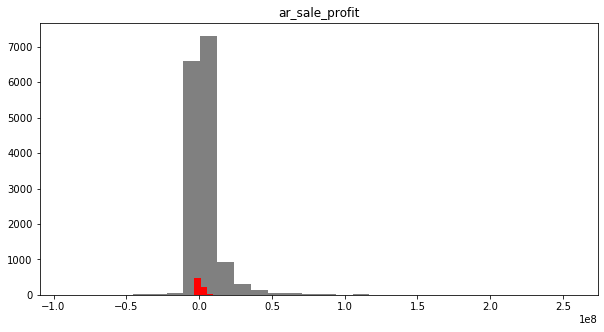

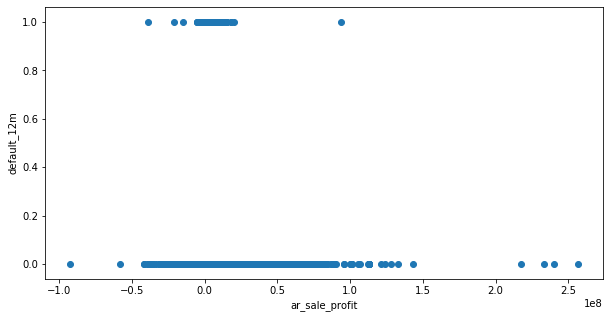

[6534, 15191, 16940, 26060, 215, 1164, 2588, 4444, 6304, 6460, 8626, 9757, 9767, 10537, 10865, 10997, 11024, 11507, 13063, 13145, 13432, 13654, 15970, 16287, 16427, 16919, 19649, 20936, 26140, 26861, 26927, 28490, 29592, 29976, 31503]


In [106]:
vision_outliers(test_remove_outliers,'ar_sale_profit',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_sale_profit < -12000000 or ar_sale_profit > 25000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_sale_profit < -40000000 or ar_sale_profit > 95000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 732
Кол-во не дефолтов 15499


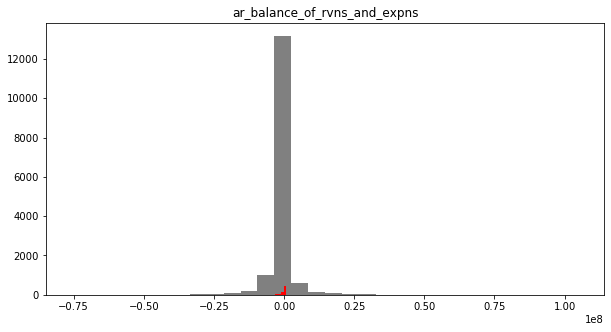

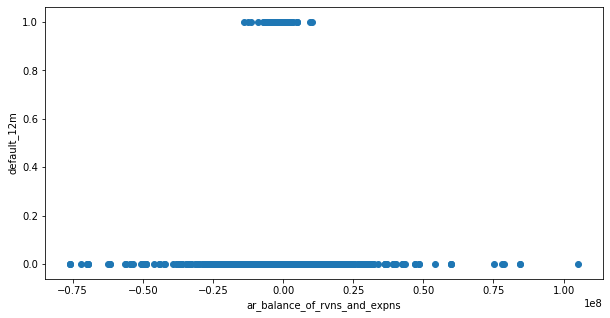

[7529, 8745, 20499, 23223, 23613, 1935, 2105, 2132, 3015, 3020, 3391, 3608, 3725, 3902, 3946, 4108, 4227, 5078, 5166, 7956, 8337, 8658, 8719, 9120, 9162, 12345, 12821, 14288, 14523, 14665, 15537, 15785, 16465, 16713, 16861, 17054, 17521, 17587, 17866, 18414, 18624, 18905, 19012, 21738, 26433, 27177, 27859, 28404, 28729, 28892, 29347, 29567, 29754, 29831, 30479, 31502, 31815]


In [107]:
vision_outliers(test_remove_outliers,'ar_balance_of_rvns_and_expns',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_balance_of_rvns_and_expns < -10000000 or ar_balance_of_rvns_and_expns > 5000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_balance_of_rvns_and_expns < -40000000 or ar_balance_of_rvns_and_expns > 38000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 727
Кол-во не дефолтов 15447


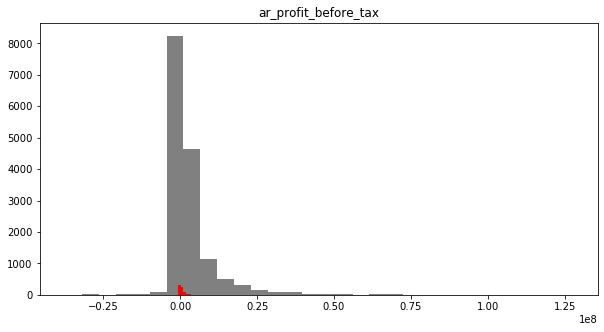

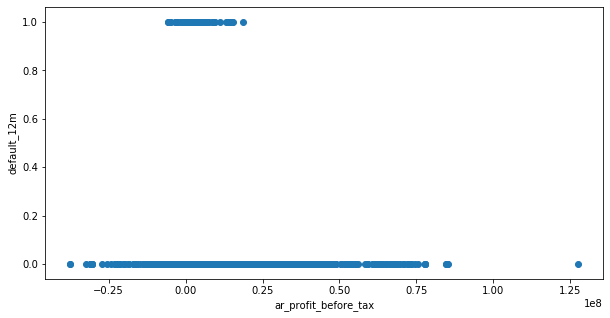

[1897, 6390, 9583, 12366, 17634, 20992, 26808, 29553, 31844]


In [108]:
vision_outliers(test_remove_outliers,'ar_profit_before_tax',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_profit_before_tax < -10000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_profit_before_tax < -32000000 or ar_profit_before_tax > 80000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 727
Кол-во не дефолтов 15438


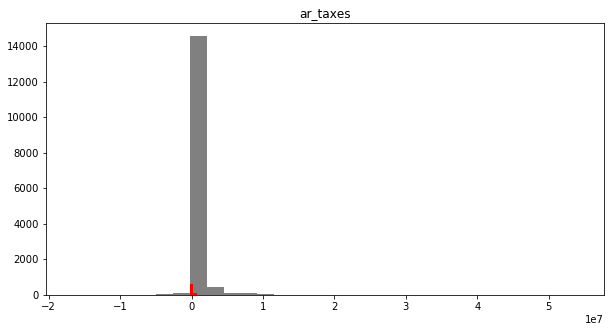

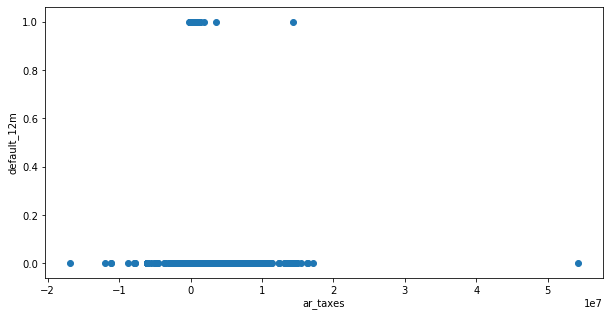

[9596, 25885, 1376, 1828, 2230, 2980, 3314, 3317, 3559, 4554, 5322, 5670, 5893, 7416, 7996, 8453, 8501, 8725, 8966, 8994, 9890, 11227, 12661, 12924, 13172, 14045, 15415, 15481, 15667, 17889, 17941, 18173, 19384, 19604, 22125, 22579, 23099, 23666, 24472, 25660, 25735, 26741, 27708, 27729, 28258, 28722, 28789, 28834, 28888, 28944, 29530, 29853, 31141, 31287, 32142, 32265]


In [109]:
vision_outliers(test_remove_outliers,'ar_taxes',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_taxes > 2000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_taxes < -4000000 or ar_taxes > 13000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 725
Кол-во не дефолтов 15384


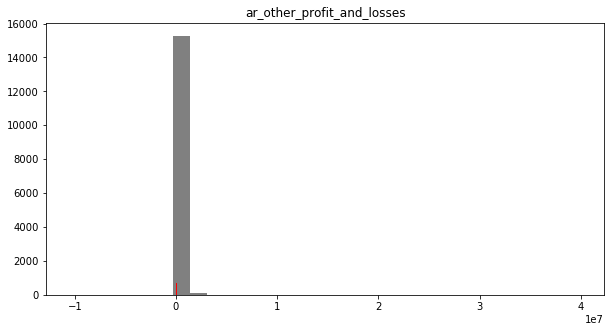

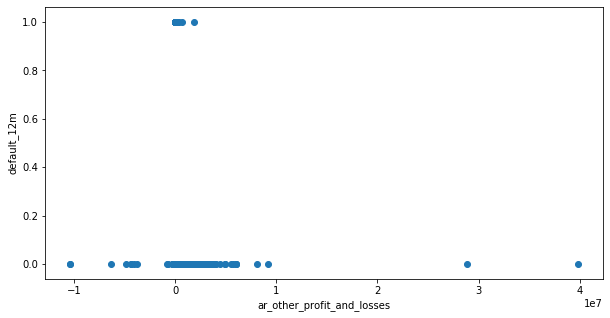

[18270, 20981, 24545, 1382, 2320, 2902, 3444, 4188, 5030, 7009, 7070, 8338, 8765, 9979, 10217, 11121, 11680, 11814, 12261, 13915, 14767, 15277, 15830, 16829, 16905, 17721, 18951, 21403, 22423, 22694, 22822, 24467, 24558, 26292, 27106, 27399, 28721, 29954, 29967, 30419, 30962, 31628]


In [110]:
vision_outliers(test_remove_outliers,'ar_other_profit_and_losses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_other_profit_and_losses > 300000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_other_profit_and_losses < -500000 or ar_other_profit_and_losses > 3000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 722
Кол-во не дефолтов 15345


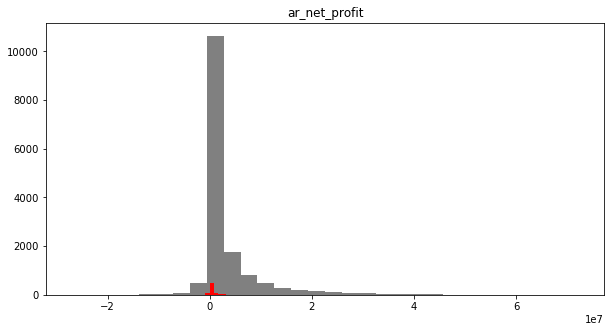

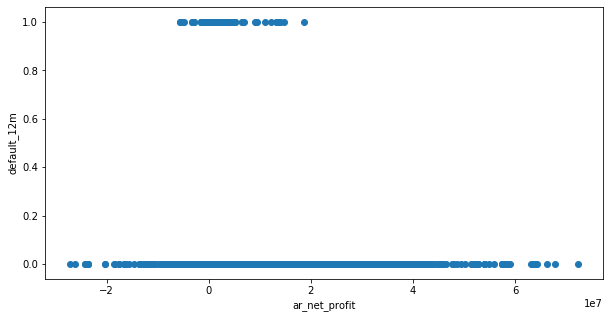

[2874, 8998, 1478, 7066, 8913, 17917, 18164, 19952, 24645, 30097]


In [111]:
vision_outliers(test_remove_outliers,'ar_net_profit',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_net_profit > 14000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_net_profit < -21000000 or ar_net_profit > 70000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 720
Кол-во не дефолтов 15337


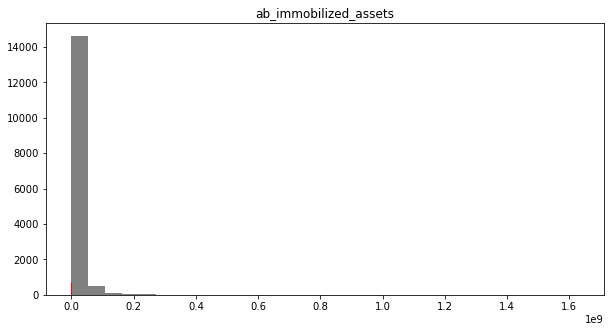

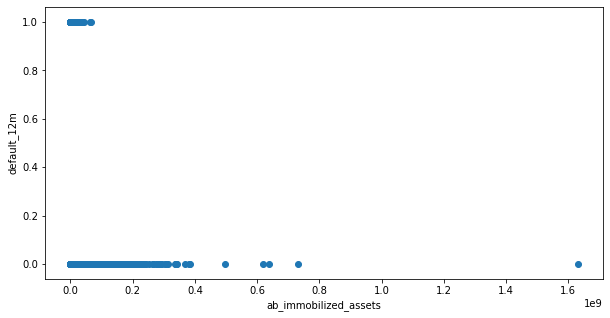

[3814, 6836, 63, 1256, 1345, 2240, 2302, 4104, 5930, 5992, 6615, 7855, 13074, 15610, 18781, 18871, 22493, 23285, 24386, 24763, 26338, 28564, 29933, 31101, 31525, 31779]


In [112]:
vision_outliers(test_remove_outliers,'ab_immobilized_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_immobilized_assets > 50000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_immobilized_assets > 250000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 718
Кол-во не дефолтов 15313


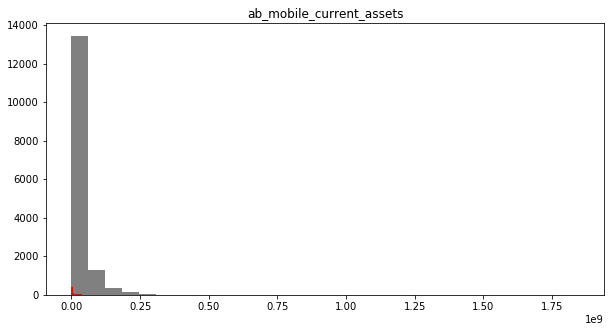

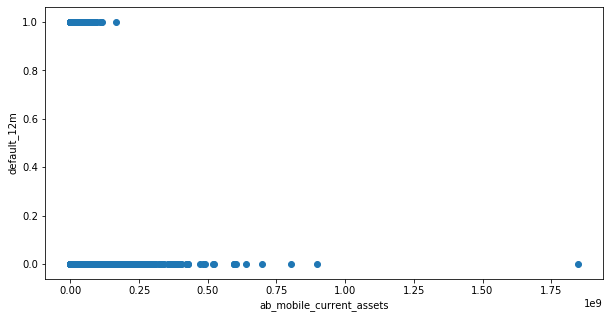

[1784, 17420, 24857, 26859, 637, 741, 1271, 1343, 3270, 5198, 5706, 6542, 7113, 7775, 7823, 8074, 8637, 8853, 9053, 10051, 11082, 11967, 12123, 13816, 15113, 16071, 18530, 19217, 20099, 23426, 26993, 28817, 28856, 31936, 32311, 32357]


In [113]:
vision_outliers(test_remove_outliers,'ab_mobile_current_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_mobile_current_assets > 100000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_mobile_current_assets > 350000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 714
Кол-во не дефолтов 15281


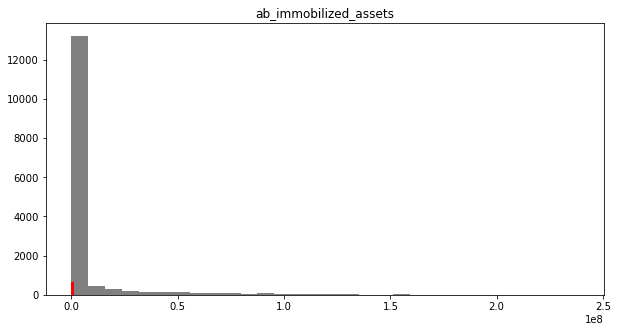

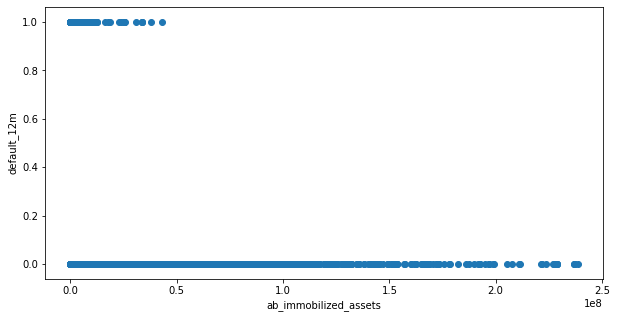

[9867, 22099, 23059, 23240, 28351, 32083, 657, 1191, 1279, 3383, 3438, 5463, 10425, 14586, 15298, 17015, 20371, 22901, 23450, 23549, 24860, 28387, 29543]


In [114]:
vision_outliers(test_remove_outliers,'ab_immobilized_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_immobilized_assets > 30000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_immobilized_assets > 200000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 708
Кол-во не дефолтов 15264


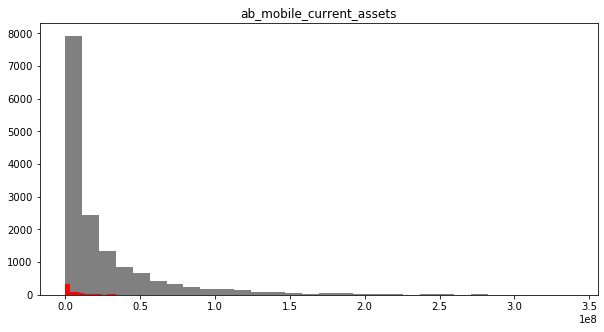

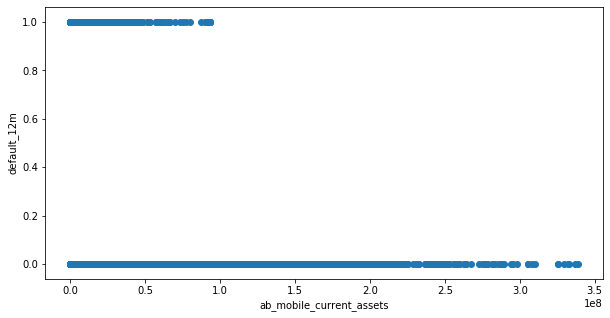

[19642, 19677, 20839, 22478, 25865, 26598, 27355]


In [115]:
vision_outliers(test_remove_outliers,'ab_mobile_current_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_mobile_current_assets > 120000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_mobile_current_assets > 310000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 708
Кол-во не дефолтов 15257


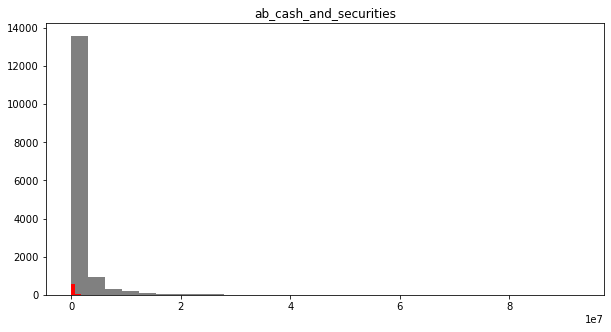

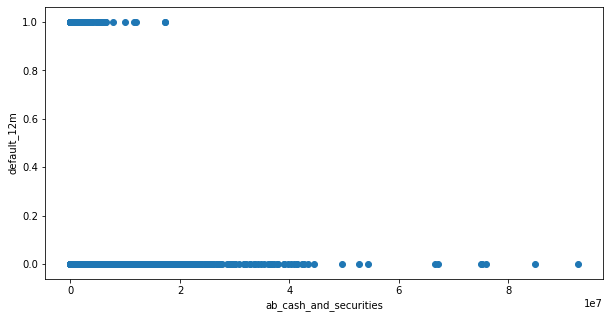

[10479, 13002, 22008, 27512, 29482, 31354, 2976, 8301, 9052, 12489, 14234, 16220, 20474, 26319, 30045, 30680]


In [116]:
vision_outliers(test_remove_outliers,'ab_cash_and_securities',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_cash_and_securities > 7000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_cash_and_securities > 46000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 702
Кол-во не дефолтов 15247


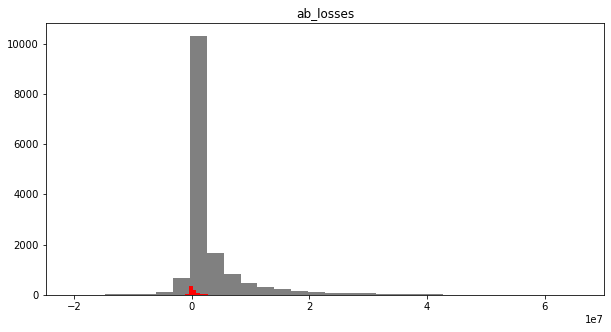

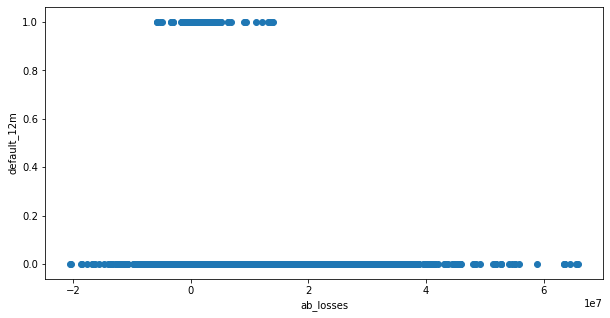

[2087, 5245, 6000, 6403, 10508, 12279, 17395, 24705, 30631, 1334, 3266, 4849, 5614, 6716, 7261, 7972, 13259, 15204, 17077, 19048, 20361, 20613, 22178, 25121, 25584, 26243, 27866, 30715]


In [117]:
vision_outliers(test_remove_outliers,'ab_losses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_losses > 8000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_losses > 50000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 693
Кол-во не дефолтов 15228


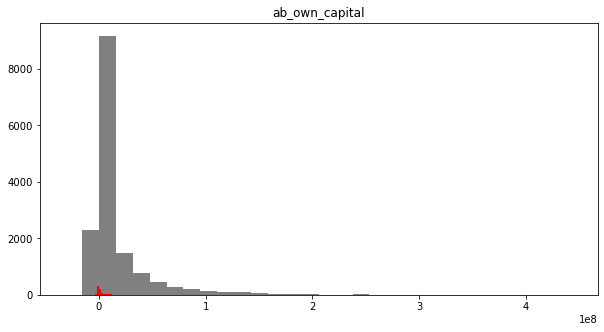

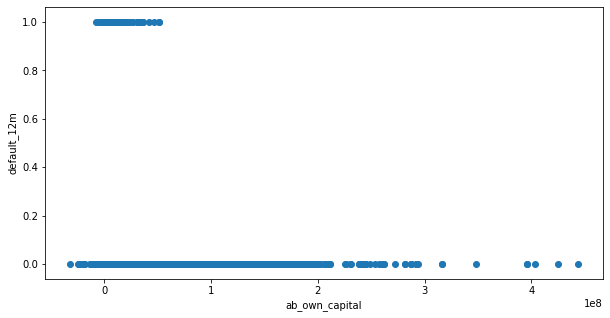

[31544, 32379, 167, 1187, 1728, 3373, 5197, 5887, 5949, 6575, 7208, 9312, 10838, 11016, 13121, 13701, 14071, 14468, 14519, 15239, 15615, 16112, 16733, 17148, 17623, 18800, 18988, 20215, 20870, 21715, 22045, 23216, 26249, 26923, 27477, 27639, 29102, 29205, 29778, 29946, 30832, 31214, 31537, 32194]


In [118]:
vision_outliers(test_remove_outliers,'ab_own_capital',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_own_capital> 47000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_own_capital < -50000000 or ab_own_capital > 210000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 691
Кол-во не дефолтов 15186


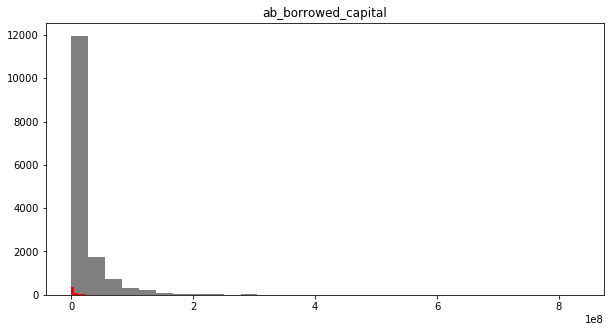

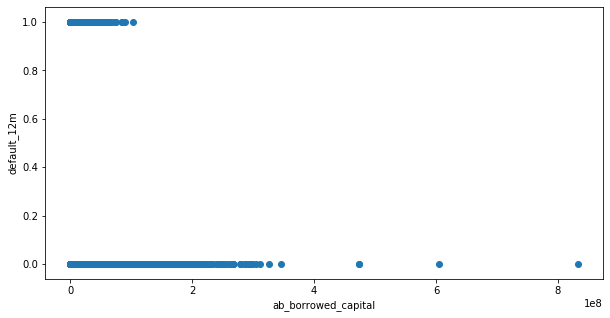

[15311, 16130, 16899, 19329, 21318, 1429, 1972, 5385, 11270, 11364, 12673, 13653, 16454, 19235, 19371, 20298, 24569, 25046, 25937, 30064, 30171, 30897, 32137]


In [119]:
vision_outliers(test_remove_outliers,'ab_borrowed_capital',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_borrowed_capital > 80000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_borrowed_capital > 280000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 686
Кол-во не дефолтов 15168


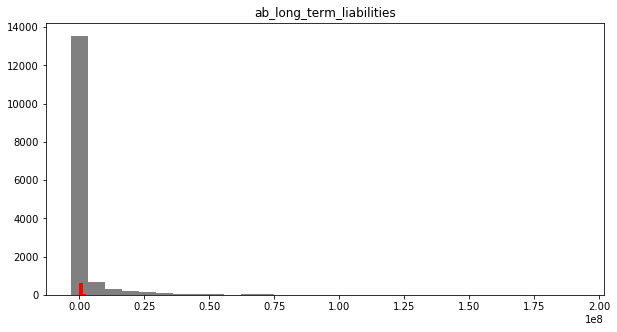

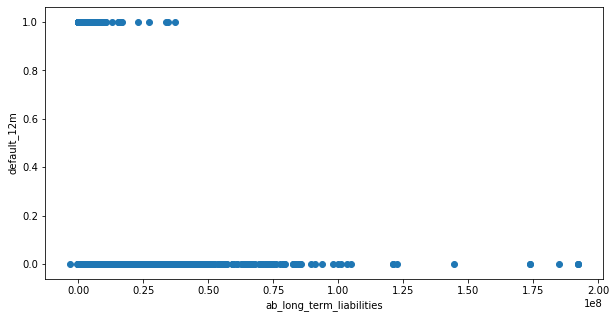

[694, 3520, 3789, 10513, 11175, 17713, 23545, 26053, 28083, 29452, 29758, 163, 462, 1414, 1488, 3481, 4221, 7661, 11104, 11181, 12216, 14459, 17960, 18169, 18884, 19623, 19684, 19882, 20132, 21588, 22033, 22473, 27169, 30742, 31089, 31443]


In [120]:
vision_outliers(test_remove_outliers,'ab_long_term_liabilities',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_long_term_liabilities > 12000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_long_term_liabilities > 80000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 675
Кол-во не дефолтов 15143


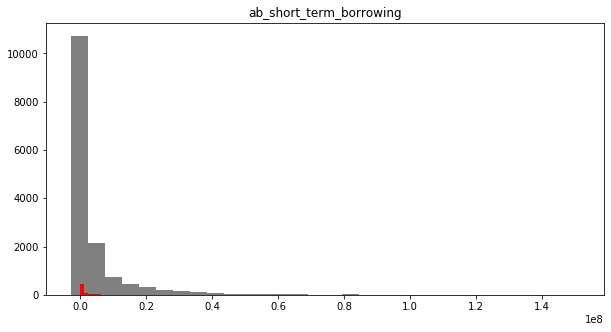

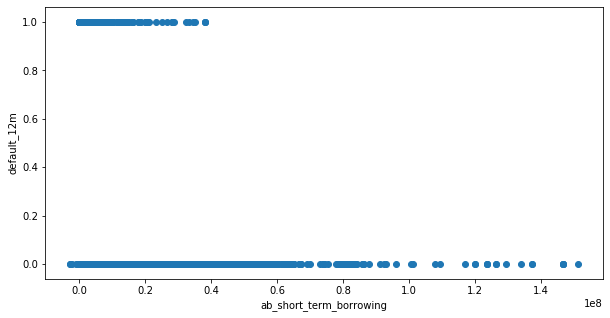

[4626, 12470, 14274, 15698, 16877, 24829, 28501, 2406, 2538, 4697, 4907, 5360, 6713, 8832, 10793, 11712, 13109, 13954, 18626, 19092, 20619, 21191, 23617, 28059, 30469, 30537, 31647, 32172]


In [121]:
vision_outliers(test_remove_outliers,'ab_short_term_borrowing',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_short_term_borrowing > 30000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_short_term_borrowing > 100000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 668
Кол-во не дефолтов 15122


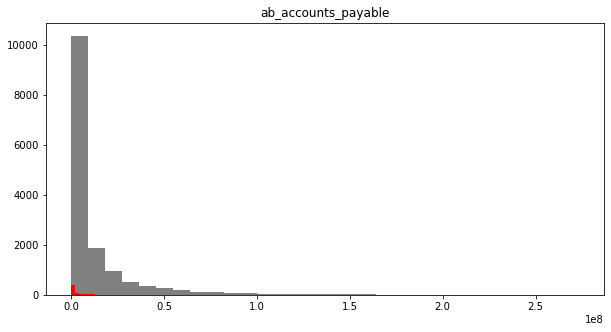

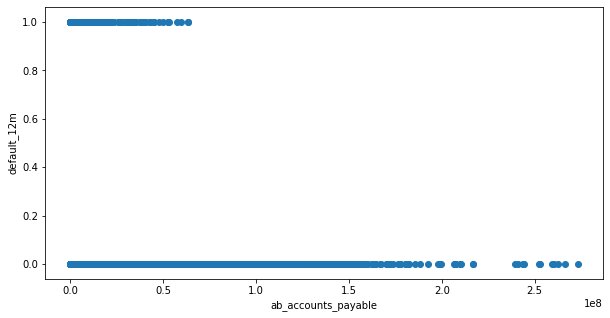

[12936, 21253, 44, 1548, 1607, 4748, 4977, 5407, 6601, 9652, 10331, 10382, 12385, 12481, 14846, 16789, 16798, 17626, 18332, 19559, 19597, 24159, 25640, 28675, 29338, 30935, 32386]


In [122]:
vision_outliers(test_remove_outliers,'ab_accounts_payable',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_accounts_payable > 60000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_accounts_payable > 200000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 666
Кол-во не дефолтов 15097


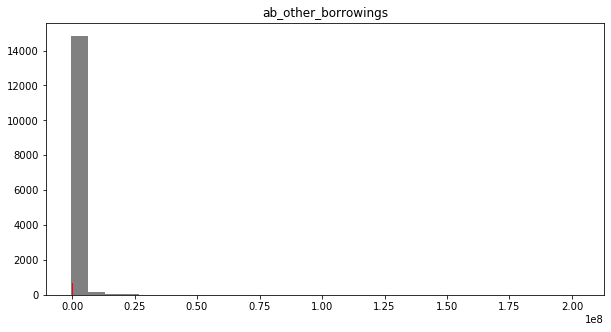

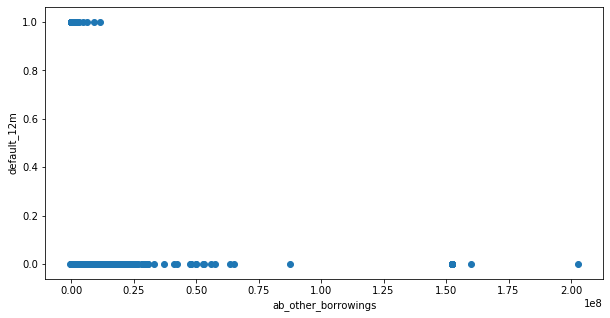

[1610, 6109, 16565, 16595, 17688, 22799, 942, 1099, 1230, 1270, 1447, 1864, 1893, 2107, 2208, 2412, 3713, 3759, 3888, 3903, 4081, 4344, 4423, 4598, 5611, 5794, 6573, 6792, 7200, 7523, 10512, 10899, 11071, 11396, 11405, 12260, 12291, 12569, 12849, 12890, 13173, 13211, 13610, 13622, 13650, 13852, 13948, 14178, 14526, 14565, 15738, 16448, 16456, 16593, 17013, 17048, 18371, 19007, 19044, 19122, 19297, 19577, 19858, 20631, 22510, 22584, 22954, 22959, 23077, 23166, 23793, 24119, 24196, 24319, 24711, 25320, 26105, 26142, 26215, 26231, 26634, 26686, 27049, 27244, 27436, 28267, 28302, 28801, 29228, 29291, 29859, 29913, 29997, 30163, 30199, 31156, 32146, 32269]


In [123]:
vision_outliers(test_remove_outliers,'ab_other_borrowings',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_other_borrowings > 2000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_other_borrowings > 14000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 660
Кол-во не дефолтов 15005


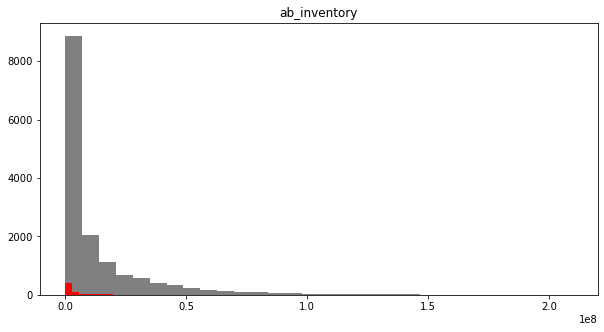

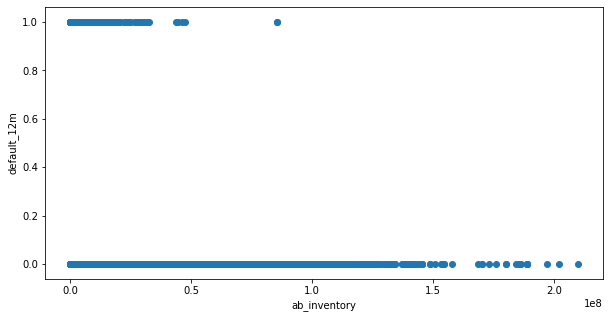

[632, 1369, 13021, 20314, 27218, 32358, 323, 591, 2305, 4095, 4105, 4179, 4286, 5539, 5748, 7923, 7989, 8410, 9569, 12320, 13949, 15668, 16500, 17974, 22577, 24415, 25159, 25201, 28119, 28816]


In [124]:
vision_outliers(test_remove_outliers,'ab_inventory',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_inventory > 40000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_inventory > 150000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

после очистки от выбросов снова соединим наши выборки(это одно из возможных решений, так же можно обучить 2 модели: на выборке с финансовымии показателями и без, но об этом подробнее мы расскажем в главе "Рекомендации")

In [125]:
df_fin_train = test_remove_outliers.copy()

In [126]:
df_fin_train = pd.concat([df_fin_train,df_no_fin_train])

## Feature Engineering

Мы решили, что интересными и gолезными признаками для данной задачи будут следующие синтетичексие признаки, которые можно найти при помощи имеющихся данных:

1). **OPEX** (`OPEX`)- операционные расходы 

\begin{eqnarray}
\mbox{OPEX} = \mbox{Общие расходы за последний год} - \mbox{Коммерческие расходы} - \mbox{Управленческие расходы}
\end{eqnarray}

Операционные расходы - это повседневные затраты компании для ведения бизнеса, производства продуктов и услуг. 

2). **Post pay** (`frac_post_pay`) - доля дохода, которая учитывает пост-оплату 

\begin{eqnarray}
\mbox{Post pay}=\frac{\mbox{Дебиторская задолженность}}{\mbox{Выручка от реализации}}
\end{eqnarray}

3). **OER**  (`OER`) - операционный коэффициент затрат (доля операционных расходов)

\begin{eqnarray}
\mbox{OER}=\frac{\mbox{OPEX}}{\mbox{Выручка от реализации}}
\end{eqnarray}

OER используется для сравнения затрат аналогчиных бизнесов. 

4). **Fraction Selling Expenses** (`frac_comer_exp`) - доля коммерческих расходов в общих расходах

\begin{eqnarray}
\mbox{FSE}=\frac{\mbox{Коммерческие расходы}}{\mbox{Общие расходы}}
\end{eqnarray}

5). **Net margin** (`Net_margin`) - чистая рентабельность

\begin{eqnarray}
\mbox{Net margin} = \frac{\mbox{Чистая прибыль}}{\mbox{Выручка от реализации}}
\end{eqnarray}

Это доля прибыли, которую бизнес получает за каждый заработанный рубль. Этот показатель используется, чтобы дать аналитическое представление о финансовой устойчивости компании.

6). **Gross Profit Margin (GPM)** (`gross_profit_margin`) - маржинальность валовой прибыли

\begin{eqnarray}
\mbox{GPM}=\frac{\mbox{Выручка от реализации} - \mbox{Себестоимость продаж}}{\mbox{Выручка от реализации}}
\end{eqnarray}

Маржинальность валовой прибыли позволяет оценить производственную эффективность. 

7). **Operational Margin** (`OP_margin`) - операционная рентабельность

\begin{eqnarray}
\mbox{Operational Margin}=\frac{\mbox{OPEX}}{\mbox{Выручка от реализации}}
\end{eqnarray}

Операционная рентабельность показывает, сколько операционной прибыли на одну единицу выручки создает компания. OP учитывает операционные расходы, что в свою очередь позволяет объективно сравнивать компании.

8). **ROE** (`ROE`) - Return on Equity - коэффициент рентабельности собственного капитала

\begin{eqnarray}
\mbox{ROE}=\frac{\mbox{Чистая прибыль}}{\mbox{Капитал}}
\end{eqnarray}

ROE позволяет оценить, насколько эффективно компания использует свой капитал. Значение ROE - это процентная ставка по которой работают деньги, вложенные в бизнес данной компании.

9). **ROA** (`ROA`) - Return on Assets - Рентабельность активов

\begin{eqnarray}
\mbox{ROA}=\frac{\mbox{Чистая прибыль}}{\mbox{Общие активы}}
\end{eqnarray}

ROA - это финансовый показатель эффективности ведения бизнеса, который, фактически, говорит о результативности использования компанией своего имущества, включая кредитные заимствования.

10). **Коэффициент Debt\EBITDA** (`Debt\EBIT`) - коэффициент долговой нагрузки на организацию

\begin{eqnarray}
\mbox{Debt\EBIT}=\frac{\mbox{Общие обязательства}}{\mbox{Валовая прибыль}}
\end{eqnarray}

Коэффициент Debt\EBITDA показывает, насколько быстро бизнес компании (без учета дополнительных факторов) может погасить существующий долг. 

Мультипликатор Debt/EBITDA позволяет оценить долговую нагрузку компании по сравнению с ее справедливой (без учета налогов, процентов и амортизации) прибылью. Чем выше этот показатель, тем большая долговая нагрузка у компании.

11). **Debt Ratio** (`Debt_ratio`) - коэффициент финансовой зависимости

\begin{eqnarray}
\mbox{Debt Ratio}=\frac{\mbox{Общие обязательства}}{\mbox{Общие активы}}
\end{eqnarray}

Debt Ratio характеризует отношение заемного капитала организации ко всему капиталу. Данный коэффициент относится к группе показателей, описывающих структуру капитала организации.

12). **Tax Ratio** (`tax_ratio`) - доля налогов

\begin{eqnarray}
\mbox{Tax Ratio}=\frac{\mbox{Текущий налог на прибыль}}{\mbox{Валовая прибыль}}
\end{eqnarray}

Tax Ratio позволяет определить налоговую нагрузку на компанию.

13). **Time Gap** (`time_gap`) 

\begin{eqnarray}
\mbox{Time Gap}=\frac{\mbox{Кредиторская задолженность}}{\mbox{Денежные средства и денежные эквиваленты} + \mbox{Дебиторская задолженность}}
\end{eqnarray}



14). **Borrowing Balance** (`borrowing_balance`)  

\begin{eqnarray}
\mbox{Borrowing Balance}=\frac{\mbox{Дебиторская задолженность}}{\mbox{Кредиторская задолженность}}
\end{eqnarray}

15). **Мультипликатор D/E** (`Debt/Equity`) - соотношение заемного капитала к собственному

\begin{eqnarray}
\mbox{Debt/Equity}=\frac{\mbox{Общие обязательства}}{\mbox{Капитал}}
\end{eqnarray}

D/E позволяет оценить долговую нагрузку компании по сравнению с ее собственным капиталом. Чем выше данный показатель, тем больше обязательств у компании. D/E показывает соотношение между долгами компании и ее собственным капиталом. 

16). **Current Ratio** (`current_ratio`) - коэффициент текущей ликвидности

\begin{eqnarray}
\mbox{Current Ratio}=\frac{\mbox{Текущие активы}}{\mbox{Текущие обязательства}}
\end{eqnarray}

Current Ratio является мерой платежеспособности организации, способности погашать текущие (до года) обязательства организации. Кредиторы широко используют данный коэффициент в оценке текущего финансового положения организации, опасности выдаче ей краткосрочных займов.

17). **Cash Ratio** (`cash_ratio`) - коэффициент абсолютной ликвидности

\begin{eqnarray}
\mbox{Cash ratio}=\frac{\mbox{Денежные средства и денежные эквиваленты}}{\mbox{Краткосрочные заемные средства}}
\end{eqnarray}

Cash Ratio показывает отношение самых ликвидных активов организации – денежных средство и краткосрочных финансовых вложений – к краткосрочным обязательствам. Коэффициент отражает достаточность наиболее ликвидных активов для быстрого расчета по текущим обязательствам, характеризует "мгновенную" платежеспособность организации. Cash Ratio является эквивалентом Current Ratio.

18). **Fast Pay** (`fast_pay`) 

\begin{eqnarray}
\mbox{Fast Pay}=\frac{\mbox{Денежные средства и денежные эквиваленты} + \mbox{Дебиторская задолженность }}{\mbox{Общие активы}}
\end{eqnarray}

19). **Turnover Ratio** (`tumover_ratio`) - коэффициент оборачиваемости

\begin{eqnarray}
\mbox{Turnover Ratio}=\frac{\mbox{Выручка от реализации}}{\mbox{Общие активы}}
\end{eqnarray}

Turnover Ratio - финансовый показатель, отражающий эффективность использования активов. Используется для анализа того, насколько эффективно предприятие управляет своими активами, является ли общее количество активов в балансе фирмы достаточным, большим или малым по отношению к текущим или прогнозируемым объёмам продаж. 

Для составления признаков мы будем использовать следующие вспомогательные величины:

\begin{eqnarray}
&&\mbox{Общие обязательства}=\mbox{Долгосрочные обязательства} + \mbox{Прочие обязательства} + \mbox{Краткосрочные заемные средства} +\mbox{Кредиторская задодженность} +\mbox{Общие долговые обязательства}
\\
&&\mbox{Общие активы}=\mbox{Собственный капитал}+\mbox{Денежные средства и денежные эквиваленты} +\mbox{Дебиторская задолженность} +\mbox{Запасы}+\mbox{Основные внеоборотные средства}+\mbox{Оборотные активы}+\mbox{Прочие оборотные активы}
\\
&&\mbox{Текущие активы}=\mbox{Оборотные активы}+\mbox{Прочие оборотные активы}+\mbox{Запасы}+\mbox{Дебиторская задолженность}
\\
&&\mbox{Текущие обязательства}=\mbox{Кредиторская задодженность}+\mbox{Краткосрочные заемные средства}+\mbox{Прочие обязательства}
\end{eqnarray}

In [138]:
def make_features(df):
    frame = df.copy()

    # общие обязательства
    total_liabilities = (frame['ab_long_term_liabilities'] + 
                           frame['ab_other_borrowings'] + 
                           frame['ab_short_term_borrowing']+ 
                           frame['ab_accounts_payable'] + frame['ab_borrowed_capital'])
    
    # общие активы
    total_assets = (frame['ab_own_capital']
                    +frame['ab_cash_and_securities']
                    +frame['ab_accounts_receivable'] 
                    +frame['ab_inventory']
                    +frame['ab_immobilized_assets']
                    +frame['ab_mobile_current_assets']
                    +frame['ab_other_current_assets'])
    
    # текущие активы
    current_assets = (frame['ab_mobile_current_assets']
                      +frame['ab_other_current_assets']
                      +frame['ab_inventory']
                      +frame['ab_accounts_receivable'])
    
    # текущие обязательства
    current_liabilities = (frame['ab_accounts_payable']
                           +frame['ab_short_term_borrowing']
                           +frame['ab_other_borrowings'])
    
    # синтетические признаки
    frame['frac_post_pay'] = frame['ar_revenue']/frame['ab_accounts_receivable']
    frame['OPEX'] = frame['ar_total_expenses'] - frame['ar_selling_expenses'] - frame["ar_management_expenses"]
    frame['OER'] = frame['OPEX']/frame['ar_revenue']
    frame['frac_comer_exp'] = frame['ar_selling_expenses' ]/ frame['ar_total_expenses']
    frame['Net_margin'] = frame['ar_net_profit']/frame['ar_revenue']
    frame['gross_profit_margin'] = (frame['ar_revenue'] - frame['ar_sale_cost'])/frame['ar_revenue']
    frame['OP_Margin'] = frame['OPEX']/frame['ar_revenue']
    frame['ROE'] = frame['ar_net_profit']/frame['ab_own_capital']
    frame['ROA'] = frame['ar_net_profit']/total_assets
    frame['Debt/EBIT'] = total_liabilities/frame['ar_profit_before_tax']
    frame['Debt_ratio_betters'] = total_liabilities/total_assets
    frame['tax_ratio'] = frame['ar_taxes']/frame['ar_profit_before_tax']
    frame['time_gap'] = frame['ab_accounts_payable']/(frame['ab_cash_and_securities']+frame['ab_accounts_receivable'])
    frame['borrowing_balance'] = frame['ab_accounts_receivable']/frame['ab_accounts_payable']
    frame['Debt/Equity'] = total_liabilities/frame['ab_own_capital']
    frame['current_ratio'] = current_assets/current_liabilities
    frame['cash_ratio'] = frame['ab_cash_and_securities']/frame['ab_short_term_borrowing']
    frame['fast_pay'] = (frame['ab_cash_and_securities']+frame['ab_accounts_receivable'])/total_assets
    frame['tumover_ratio'] = frame['ar_revenue']/total_assets

    return frame

Создаем признаки только для выборок с финансовой отчетностью:

In [139]:
df_fin_train_feature = make_features(df_fin_train)
df_fin_test_feature_complex = make_features(test_df.fillna(0))

Теперь же очистим наши выборки от ненужных столбцов. Это все абсолютные значения финансовых показателей.




In [140]:
fin_abs_features = ['ar_revenue',
                   'ar_other_profit_and_losses',
                   'ar_profit_before_tax', 
                   'ar_taxes', 
                   'ar_total_expenses', 
                   'ar_sale_cost', 
                   'ar_selling_expenses', 
                   'ar_management_expenses',
                   'ar_sale_profit', 
                   'ar_balance_of_rvns_and_expns']

In [141]:

df_fin_train_feature_complex = df_fin_train_feature.drop(fin_abs_features, axis = 1)
df_fin_test_feature_complex = df_fin_test_feature_complex.drop(fin_abs_features, axis = 1)


In [142]:
def find_correlated_features(df_, threshold):
    """
    Функция, которая выводит признаки по порогу корреляции
    """
    corr_matrix = df_.corr().abs()
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
    df_ = corr_matrix.stack().reset_index()
    df_.columns = ['feature1', 'feature2', 'corr_coef']
    df_ = df_[df_.corr_coef >= threshold].sort_values('corr_coef', ascending=False)
    return df_

In [143]:
find_correlated_features(df_fin_train_feature, 0.6)

,feature1,feature2,corr_coef
1339,gross_profit_margin,OP_Margin,1.000000
138,ar_sale_cost,OPEX,1.000000
1297,OER,OP_Margin,1.000000
1296,OER,gross_profit_margin,1.000000
1080,head_actual_age,cap_actual_age,1.000000
1054,adr_actual_age,cap_actual_age,1.000000
1053,adr_actual_age,head_actual_age,1.000000
0,ar_revenue,ar_total_expenses,0.998376
491,ar_net_profit,ab_losses,0.997530
87,ar_total_expenses,OPEX,0.996150


In [144]:
corr_columns_to_del_fin = ['adr_actual_age','OP_Margin','gross_profit_margin',
                            'head_actual_age','ar_net_profit','ab_borrowed_capital','ab_mobile_current_assets',
                            'bus_age','frac_post_pay','ab_accounts_payable','tax_ratio','ab_own_capital','tumover_ratio',
                           'ab_accounts_receivable','ab_immobilized_assets','ab_inventory','ab_other_borrowings']

Посмотрим на новые признаки у выборок с финансовой отчетностью:

In [145]:
df_fin_train_feature_complex.head(10)

,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,default_12m,frac_post_pay,OPEX,OER,frac_comer_exp,Net_margin,gross_profit_margin,OP_Margin,ROE,ROA,Debt/EBIT,Debt_ratio_betters,tax_ratio,time_gap,borrowing_balance,Debt/Equity,current_ratio,cash_ratio,fast_pay,tumover_ratio
0,1198000.0,0.0,7240000.0,4988000.0,2252000.0,0.0,255000.0,1198000.0,663000.0,15872000.0,0.0,11349000.0,4523000.0,0.0,198,136,3,3,3,2,50000.0,2,0,0,0,23.532860,48344000.0,0.912220,0.000000,0.022605,0.087780,0.912220,1.806938,0.077802,15.530333,2.061566,0.413894,1.804148,0.497900,47.879336,0.912298,0.022469,0.162813,3.441746
3,1919000.0,0.0,4245000.0,4082000.0,163000.0,0.0,25000.0,1919000.0,2219000.0,3652000.0,0.0,3652000.0,0.0,0.0,185,139,8,8,8,2,300000.0,1,0,0,0,196.619632,29568000.0,0.922587,0.000000,0.059877,0.077413,0.922587,0.864804,0.178778,3.288609,0.680455,0.135975,0.000000,inf,3.291573,2.324754,0.006846,0.017514,2.985746
4,711000.0,0.0,8950000.0,8606000.0,344000.0,0.0,492000.0,711000.0,12439000.0,1279000.0,0.0,0.0,1279000.0,0.0,220,138,27,27,27,2,10000.0,2,0,0,0,47.843023,14935000.0,0.907461,0.000000,0.043201,0.092539,0.907461,0.057159,0.023061,2.048038,0.082968,0.430745,1.529904,0.268960,0.205644,13.995309,inf,0.027116,0.533813
9,2135000.0,0.0,24680000.0,8263000.0,16417000.0,0.0,106000.0,2135000.0,11267000.0,11912000.0,0.0,13000.0,11899000.0,0.0,170,132,15,15,15,0,10000.0,2,0,0,0,7.640373,122655000.0,0.977861,0.000000,0.017021,0.022139,0.977861,0.189491,0.035154,8.778187,0.392274,0.213338,0.720148,1.379696,2.114494,4.143721,8.153846,0.272060,2.065302
10,104000.0,0.0,38004000.0,23189000.0,14815000.0,0.0,449000.0,104000.0,10000.0,38443000.0,0.0,4986000.0,33457000.0,0.0,29,29,4,4,4,2,10000.0,2,0,0,0,4.020925,59331000.0,0.995988,0.000000,0.001746,0.004012,0.995988,10.400000,0.001360,541.450704,1.005479,0.267606,2.191889,0.442807,7688.600000,1.977161,0.090052,0.199616,0.779029
11,21608000.0,2094000.0,106180000.0,1180000.0,105000000.0,0.0,557000.0,21608000.0,90313000.0,18518000.0,0.0,7500000.0,11018000.0,0.0,102,102,4,4,4,1,300000.0,2,0,0,0,1.715476,142075000.0,0.788758,0.103724,0.119961,0.211242,0.788758,0.239257,0.070771,1.713995,0.121301,0.000000,0.104380,9.529860,0.410085,11.467761,0.074267,0.345721,0.589947
12,71000.0,1269000.0,35349000.0,28034000.0,7237000.0,78000.0,2008000.0,71000.0,94000.0,38532000.0,2866000.0,0.0,35666000.0,0.0,24,24,7,7,7,2,21000.0,1,0,0,0,4.888075,4710000.0,0.133145,0.830635,0.002007,0.866855,0.133145,0.755319,0.000959,865.887640,1.040435,0.202247,3.857869,0.202910,819.829787,1.982224,inf,0.124816,0.477595
14,855000.0,0.0,11564000.0,8770000.0,2794000.0,0.0,606000.0,855000.0,865000.0,0.0,0.0,0.0,0.0,0.0,20,20,16,16,16,2,10000.0,1,0,0,0,8.282749,22064000.0,0.953418,0.000000,0.036946,0.046582,0.953418,0.988439,0.034758,0.000000,0.000000,0.200187,0.000000,inf,0.000000,inf,inf,0.138217,0.940770
15,157000.0,0.0,3879000.0,1643000.0,2236000.0,0.0,213000.0,157000.0,219000.0,3873000.0,0.0,2387000.0,1486000.0,0.0,48,48,16,16,16,2,10000.0,1,0,0,0,7.221825,15893000.0,0.984209,0.000000,0.009723,0.015791,0.984209,0.716895,0.019170,39.319797,0.945788,0.203046,0.606778,1.504711,35.369863,2.003098,0.089233,0.299023,1.971673
16,0.0,10000.0,0.0,0.0,0.0,0.0,150000.0,0.0,10000.0,150000.0,0.0,150000.0,0.0,0.0,20,20,4,4,4,2,10000.0,1,0,0,0,inf,146000.0,0.169767,0.182482,0.000000,0.830233,0.169767,0.000000,0.000000,inf,1.764706,NaN,0.000000,NaN,30.000000,0.000000,1.000000,0.882353,5.058824


Заметим, что в некоторых новых признаках присутствуют значения inf и nan (из-за деления на 0). Заменим их на 0, а так же удалим все столбцы, которые мы пометили как признаки с высокой коррелцией

In [146]:
df_fin_train_feature_complex_fillna = df_fin_train_feature_complex.fillna(0)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex.fillna(0)

df_fin_train_feature_complex_fillna = df_fin_train_feature_complex_fillna.replace(np.inf,0)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna.replace(np.inf,0)
df_fin_train_feature_complex_fillna = df_fin_train_feature_complex_fillna.replace(-np.inf,0)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna.replace(-np.inf,0)

In [147]:
df_fin_train_feature_complex_fillna = df_fin_train_feature_complex_fillna.drop(corr_columns_to_del_fin,axis =1)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna.drop(corr_columns_to_del_fin,axis =1)

In [148]:
# для будущего поиска бизнес-инсайтов сделаем копию данного датафрейма
df_graphs_fin_train = df_fin_train_feature_complex_fillna.copy()

## Отбор признаков

### WOE

Теперь начинается самый важный этап в определении дефолта компании для логистической регрессии – необходимо написать WoE-binning для числовых и категориальных переменных.  На этом этапе мы преобразуем наши исходные значения так, что связь между зависимой и независимой переменной становится монотонной. В принципе мы могли бы использовать исходные значения признаков для нашей задачи, но WoE-преобразование имеет следующие положительные эффекты:  
- Каждое значения признака в результате преобразования содержит показатель вклада этого значения в целевую переменную, что является наиболее информативным показателем, чем исходное значение признака. По сути, каждое значение признака несет в себе информацию о целевом показателе. 
- Позволяет выявить сложные нелинейные взаимосвязи
- Преобразование основано на логарифмическом распределении, что делает связь между таргетом и нашими признаками монотонной
- Нет риска столкнуться с проблемой разреженных данных. так как все значения признаков в результате преобразования будут числовыми 
- Снижает риск переобучения модели 
- За счет логарифмического преобразования разница между значениями по мере их роста не большая. Следовательно, WoE позволяет нам бороться с выбросами и гетероскедастичностью 
- Избавляет нас от необходимости использовать стандартизацию признаков
- Используется для построения скоринговой карты 


Формулы, которые используются для подсчета WoE и IV:

WoE для каждого значения признака: 

\begin{eqnarray}
\mbox{WoE}=ln(\frac{\mbox{%Default}}{\mbox{%Non-Default}})
\end{eqnarray}

IV для каждого признака: 

\begin{eqnarray}
\mbox{IV}=(\mbox{%Default} - \mbox{%Non-Default}) * \mbox{WoE}
\end{eqnarray}

In [149]:
def calc_woe_iv(df, feature, target):
    '''
    На выход идет таблица со значениями WoE для каждого значения признака 
    и критерий информативности IV для каждого признака
    '''
    
    vals = list(df[feature].unique())
    count_all = []
    default = []
    non_default = []
    
    for i in vals:
        count_all.append(len(df[df[feature] == i]))
        default.append(len(df[(df[target] == 1) & (df[feature] == i)]))
        non_default.append(len(df[(df[target] == 0) & (df[feature] == i)]))
    
    data = {'value': vals, 'count_all': count_all, 'default': default, 'non_default': non_default}
    df_woe_iv = pd.DataFrame(data)
        
    df_woe_iv['Distr_non_default'] = df_woe_iv['non_default'] / df_woe_iv['non_default'].sum()
    df_woe_iv['Distr_default'] = df_woe_iv['default'] / df_woe_iv['default'].sum()
    name_woe = 'WoE_' + feature
    df_woe_iv[name_woe] = np.log(df_woe_iv['Distr_non_default'] / df_woe_iv['Distr_default'])
    df_woe_iv = df_woe_iv.replace({name_woe: {np.inf: 0, -np.inf: 0}})
    df_woe_iv['IV'] = (df_woe_iv['Distr_non_default'] - df_woe_iv['Distr_default']) * df_woe_iv[name_woe]
    iv = df_woe_iv['IV'].sum()
    
    return df_woe_iv, iv

Найдем оптимальное количество бинов для каждого признака. 

In [150]:
# подсчет оптимального разбиения признака на бины
number_bins = range(1, 20)
ivvv = []

for feature in df_fin_train_feature_complex_fillna.columns:
    
    if feature == 'default_12m':
        continue

    name = 'cut_' + str(feature)
    for i in number_bins:
        df_fin_train_feature_complex_fillna[name] = pd.cut(df_fin_train_feature_complex_fillna[feature], i)
        ivvv.append(calc_woe_iv(df_fin_train_feature_complex_fillna, name, 'default_12m')[1])
    
    
    bin_iv = {}
    for A, B in zip(number_bins, ivvv):
        bin_iv[A] = B
    cut_bin = max(bin_iv, key=bin_iv.get)

    df_fin_train_feature_complex_fillna[name] = pd.cut(df_fin_train_feature_complex_fillna[feature], cut_bin)
    del df_fin_train_feature_complex_fillna[feature]

In [70]:
# считаем IV для каждого признака
def calc_iv_features(df, target):
    ivs = []
    feature_names = df.columns
    for i in feature_names:
        df_woe_iv = calc_woe_iv(df, i, target)[0]
        ivs.append(df_woe_iv['IV'].sum())
    
    data = {'feature_name': feature_names, 'iv': ivs}
    df_iv = pd.DataFrame(data)
    return df_iv

In [71]:
res_feature_iv = calc_iv_features(df_fin_train_feature_complex_fillna, 'default_12m')

In [72]:
feat_iv = list(res_feature_iv['feature_name']) + ['default_12m']

In [73]:
df_fin_train_feature_complex_fillna_iv = df_fin_train_feature_complex_fillna.loc[:,feat_iv[1:]]

In [74]:
train_feat_iv = (['WoE_'+label for label in feat_iv[:-1]]+['default_12m'])[1:]

In [75]:
# Трансформируем тренеровочную выборку
for feature in df_fin_train_feature_complex_fillna_iv:
    if feature == 'default_12m':
        continue
    temp = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, feature, 'default_12m')[0]
    res = df_fin_train_feature_complex_fillna_iv.merge(temp, how='left', left_on=feature, right_on = 'value')
    del res['value']
    df_fin_train_feature_complex_fillna_iv = res.copy()

df_fin_train_feature_complex_fillna_iv_fin = df_fin_train_feature_complex_fillna_iv[train_feat_iv]

In [76]:
frame_for_scoring_map = df_fin_train_feature_complex_fillna_iv

In [77]:
test_feat_iv = [column_name[4:] for column_name in feat_iv[:-1]][1:]

Заключительным шагом WoE-преобразования является применение WoE-трансформации к тестовой выборке. Для этого мы используем то же разбиение на бины для каждого признака, что имели и в тренировочной выборке. И присваиваем каждому значению признаков те же WoE, что и имели в тренировочной выборке. 

In [78]:
# woe для тестовой выборки 
df_fin_test_feature_complex_fillna_iv = df_fin_test_feature_complex_fillna.loc[:,test_feat_iv]

In [79]:
# Трансформируем тестовую выборку
final_test = pd.DataFrame()
for cut_label,label in zip(feat_iv[1:],test_feat_iv):
    ab_losses_woe = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, cut_label, 'default_12m')[0]
    ab_losses_arr = list(ab_losses_woe['value'])
    test_bins = pd.DataFrame(pd.cut(df_fin_test_feature_complex_fillna_iv[label], bins = pd.IntervalIndex(ab_losses_arr)))
    test_ab_losses_woe = test_bins.merge(ab_losses_woe, how='left', left_on=label, right_on = 'value')['WoE_'+cut_label]
    test_ab_losses_woe = test_bins.merge(ab_losses_woe, how='left', left_on=label, right_on = 'value')['WoE_'+cut_label]
    final_test = pd.concat([final_test,pd.DataFrame(test_ab_losses_woe)],axis =1)

In [80]:
# нужно произвести заново деление по woe признакам
X_train_fin = df_fin_train_feature_complex_fillna_iv_fin.drop('default_12m', axis = 1) 
y_train_fin = df_fin_train_feature_complex_fillna_iv_fin['default_12m']

In [81]:
# Выделим по 100 объектов каждого класса и образуем из них валидационную выборку
index_to_del_from_train = X_train_fin.merge(y_train_fin,left_index=True,right_index=True).groupby('default_12m').apply(lambda x: x.sample(n=100,random_state = 42)).index.get_level_values(level=1)#.reset_index(drop = True)
X_valid_fin = X_train_fin.merge(y_train_fin,left_index=True,right_index=True).groupby('default_12m').apply(lambda x: x.sample(n=100,random_state = 42)).reset_index(drop = True)
X_valid_fin.default_12m.value_counts()
X_train_fin = X_train_fin.drop(index_to_del_from_train.tolist(),axis = 0)
y_train_fin = y_train_fin.drop(index_to_del_from_train.tolist(),axis = 0)
y_valid_fin = X_valid_fin['default_12m']
X_valid_fin = X_valid_fin.drop('default_12m',axis =1)

## Модель

Так как у нас было требование на интерпретируемость, а так же мы использовали WOE трансформацию. Мы выбрали основным своим алгоритмом логистическую регрессию. Так как данная модель относится к классу линейный классификаторов, которые лучше работают с стандартизированными данными мы так же добавили в свой Pipeline StandardScaler. Еще мы добавили синтетическую генерацию несбалансированного класса при помощи SMOTE, из-за того что в выборке не было баланса между классами(класс дефолтов был равен ~ 6 % от всей выборки), что могло негативно сказаться на способности модели предсказывать дефолты.

### Обучение и предсказание

Отберем лучших 15 признаков при помощи SequentialFeatureSelector, как базовую моель будем использовать логистическую с L1 регуляризатором

In [82]:

logreg = LogisticRegression(random_state = 42, solver = 'liblinear', penalty = 'l1')
folds = StratifiedKFold(n_splits =3, shuffle = True, random_state = 42)
count =15
top_features_selector = SFS(logreg, 
           k_features = count, 
           forward = True,  
           scoring ='accuracy',
           cv = folds)

top_features_selector = top_features_selector.fit(X_train_fin, y_train_fin)
top_feat_fin = list(top_features_selector.subsets_[count]['feature_names'])

Обучим модель и подберем гиперпараметры на кросс-валидации

In [83]:
pipe_fin_pipe = Pipeline(steps=
    [

        ('smote',SMOTE(random_state=42)),
        ('stand',StandardScaler(with_mean=True)),
        ('log',LogisticRegression(max_iter=1000))
    ]
)
# Зададим диапазон перебора параметра
parametrs_logreg = {'log__C': np.logspace(0.5, -5, 10),
                    'smote__k_neighbors': range(2, 12)}



# Инициализируем кросс-валидационный перебор параметра
pipe_fin = GridSearchCV(pipe_fin_pipe,
                                  parametrs_logreg,
                                  scoring='accuracy'
                                  )

pipe_fin.fit(X_train_fin.loc[:,top_feat_fin],y_train_fin)

test_proba = pipe_fin.predict(X_valid_fin.loc[:,top_feat_fin])

Посмотрим на гиперпараметры, которые у нас получились

In [84]:
pipe_fin.best_params_

{'log__C': 3.1622776601683795, 'smote__k_neighbors': 9}

Рассчитаем метрику

In [85]:
accuracy_score(y_valid_fin,test_proba)

0.65

In [86]:
final_test = final_test.fillna(final_test.mode().iloc[0])

Сделаем предсказания, порог задан с целью улучшени скора в лидерборде, но так же есть еще по крайней мере один метод подбора порога, о котором мы также подробнее расскажем в разделе "Рекомендации"

In [87]:
preds_fin = (pipe_fin.predict_proba(final_test.loc[:,top_feat_fin])[:,1]>0.539).astype(int)

Посчитаем кол-во единиц в нашем предсказании

In [88]:
sum(preds_fin)

100

Посмотрим так же на метрику ROC-AUC и на ROC кривую

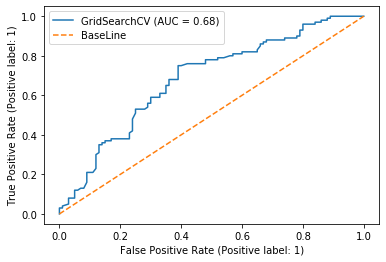

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipe_fin, X_valid_fin.loc[:,top_feat_fin], y_valid_fin) 
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label = 'BaseLine',ls = '--')
plt.legend();

### Оцененка влияния включенных факторов модели на целевую переменную (интерпретация модели): PDP

Интерпретация предсказаний модели подразумевает анализ, в какой степени каждый из признаков влияет на результат предсказания. Если мы не просто знаем, что компания объявит/не объявит дефолт, но так же понимаем, что влияет на этот факт, мы сможем в будущем выстраивать стратегию, направленную на повышение эффективности работы банка.

Выявим, проинтерпретируем и оценим влияние признака на прогнозируемый результат модели. Для этого мы построим графики **Partial Dependence Plots** (графики частичной зависимости). Графики PDP в некотором смысле могут интерпретироваться аналогично весам признаков в логистической регресии.

+ На оси OX отображаются значения признака. 
+ Ось OY показывает уверенность в том, какому классу принадлежит объект (положительные значения на оси OY - уверенность в принадлежности к классу +1; отрицательные значения - уверенность в принадлежности к классу 0). 
+ Синяя область обозначает интервал доверия.

Также с помощью PDP можно увидеть, по достижении какого значения признака мы "насыщаемся" им, и дальнейшее увеличение значения перестает увеличивать уверенность в принадлежности объектов к тому или иному классу.

Ещё с помощью PDP можно оценить характер зависимости между признаком и предсказанием: линейная или более сложная.

Сначала построим **1D PDP** (на каждом из них оценивается один признак):

In [90]:
# Посмотрим на признаки, на которых обучалась наша модель
features_fin = list(X_train_fin.loc[:,top_feat_fin].columns)
features_fin

['WoE_cut_ab_other_current_assets',
 'WoE_cut_ab_cash_and_securities',
 'WoE_cut_ab_losses',
 'WoE_cut_ab_long_term_liabilities',
 'WoE_cut_ab_short_term_borrowing',
 'WoE_cut_ogrn_age',
 'WoE_cut_cap_actual_age',
 'WoE_cut_ul_staff_range',
 'WoE_cut_ul_capital_sum',
 'WoE_cut_ul_founders_cnt',
 'WoE_cut_ul_branch_cnt',
 'WoE_cut_ul_strategic_flg',
 'WoE_cut_OPEX',
 'WoE_cut_OER',
 'WoE_cut_frac_comer_exp']

Выведем и проанализируем наиболее интересные графики:

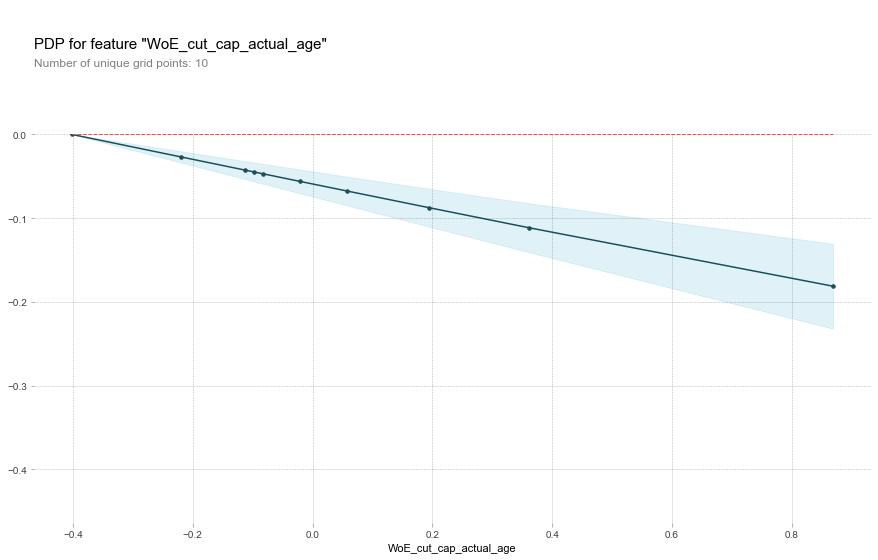

In [91]:
# Собираем данные для графика
pdp_woe= pdp.pdp_isolate(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, feature='WoE_cut_cap_actual_age')
# Строим график
pdp.pdp_plot(pdp_woe, 'WoE_cut_cap_actual_age')
plt.show()

График выше можно проинтерпретировать следующим образом: чем выше срок с момента установки капитала, тем больше наша модель уверена в том, что соответствующая компания не объявит дефолт. Заметим, что наша модель никогда не бывает уверена более, чем на 0.2, в том, что компания не объявит дефолт.

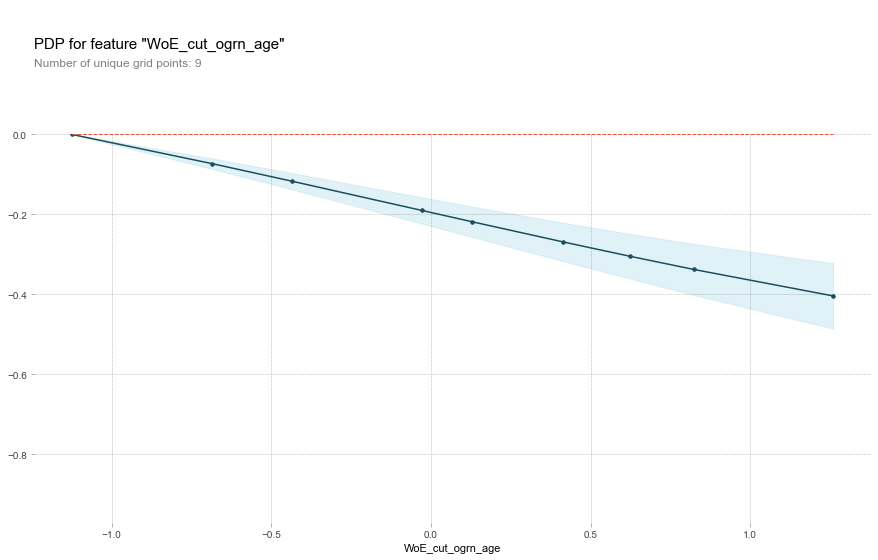

In [92]:
# Собираем данные для графика
pdp_woe= pdp.pdp_isolate(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, feature='WoE_cut_ogrn_age')
# Строим график
pdp.pdp_plot(pdp_woe, 'WoE_cut_ogrn_age')
plt.show()

Вывод по графику выше аналогичен выводу по предыдущему графику. Чем выше срок с момента регистрации компании, тем больше наша модель уверена в том, что класс этого объекта отрицательный. Отличие от предыдущего графика в том, что по этому признаку наша модель может выдать большую уверенность (до 0.4), а по прошлому - всего до 0.2.

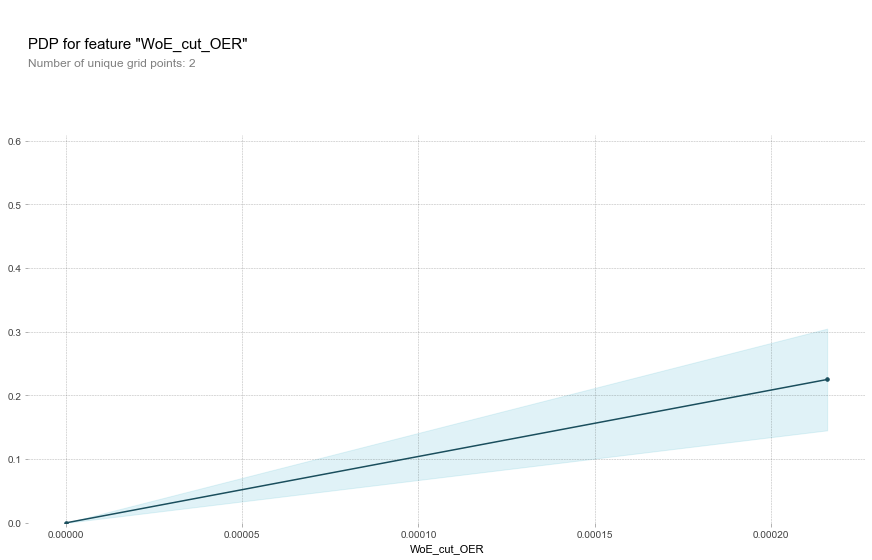

In [93]:
# Собираем данные для графика
pdp_woe= pdp.pdp_isolate(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, feature='WoE_cut_OER')
# Строим график
pdp.pdp_plot(pdp_woe, 'WoE_cut_OER')
plt.show()

На графике выше мы наблюдаем признак, по которому наша модель убеждается в положительном классе, в отличие от двух предыдущих признаков.Чем выше значение OER (операционный коэффициент затрат), тем больше модель уверена, что компания объявит дефолт.

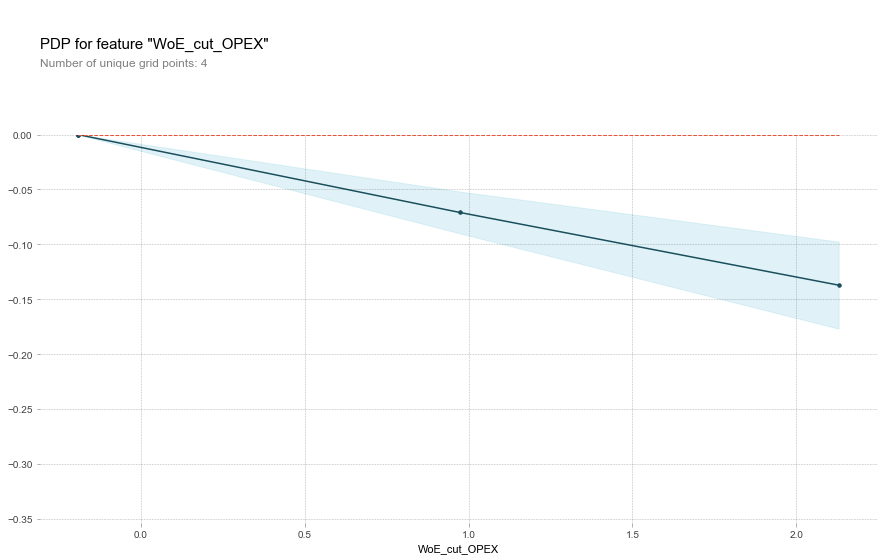

In [94]:
# Собираем данные для графика
pdp_woe= pdp.pdp_isolate(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, feature='WoE_cut_OPEX')
# Строим график
pdp.pdp_plot(pdp_woe, 'WoE_cut_OPEX')
plt.show()

Интересный факт по графику выше: мы видим, что чем выше операционные расходы, тем больше уверенность модели в том, что компания не объявит дефолт. При этом до этого мы видели, что чем выше операционный коэффициент затрат (OER), равный отношению OPEX и Выручки от реализации, тем больше уверенность модели в положительном классе. 

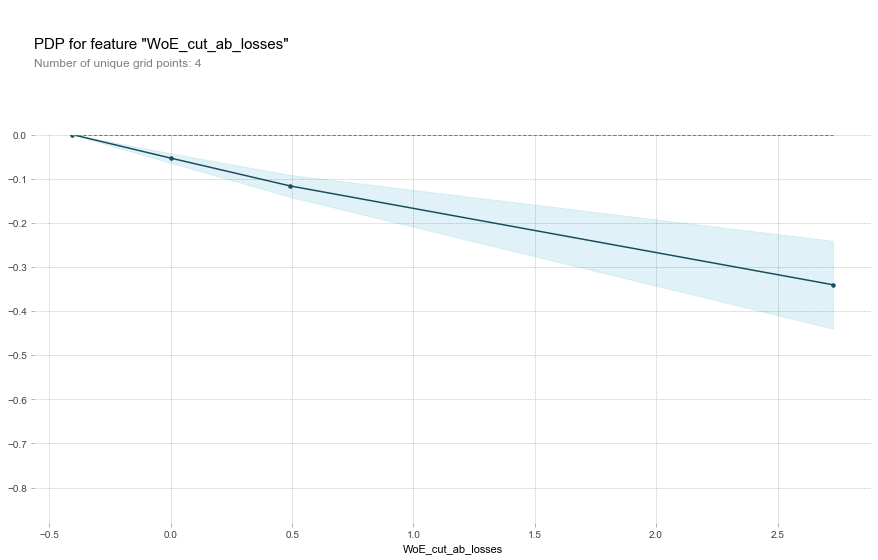

In [95]:
# Собираем данные для графика
pdp_woe= pdp.pdp_isolate(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, feature='WoE_cut_ab_losses')
# Строим график
pdp.pdp_plot(pdp_woe, 'WoE_cut_ab_losses')
plt.show()

На графике выше мы наблюдаем кусочно-линейную функцию. Чем выше нераспределенная прибыль, тем больше модели уверена в отрицательном классе. При этом в точке, где WOE_cut_ab_losses = 0.5, мы наблюдаем "перегрев": при  WOE_cut_ab_losses < 0.5 увеличение нераспределенной прибыли слабее увеличивало нашу уверенность в отрицательном классе, по сравнению с участком  WOE_cut_ab_losses > 0.5. Все потому что левый участок нашей прямой более пологий, чем правый участок. 

Теперь посмотрим на интересные взаимодейсвтия признаков и их влияние на предсказание. Для этого построим 2D PDP:
+ по оси OX - признак №1
+ по оси OY - признак №2
+ цветом обозначен уровень уверенности в принадлежности классу 1 (чем ближе к 1, тем больше уверенность, что случится дефолт компании)

Выведем и проанализируем наиболее интересные графики:

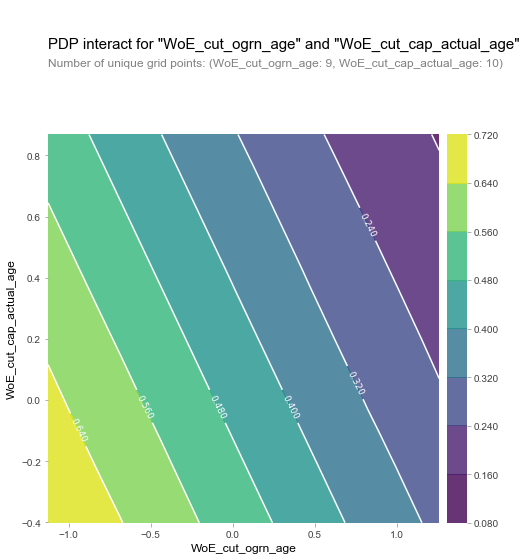

In [96]:
# Влияние двух признаков на предсказание
features_to_plot = ['WoE_cut_ogrn_age', 'WoE_cut_cap_actual_age']
inter1  =  pdp.pdp_interact(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

По графику выше мы видим, что наша модель предсказывает самую высокую вероятность дефолта (желтый участок) при комбинации минимальных сроков с момента установки капитала и с момента регистрации компании.  

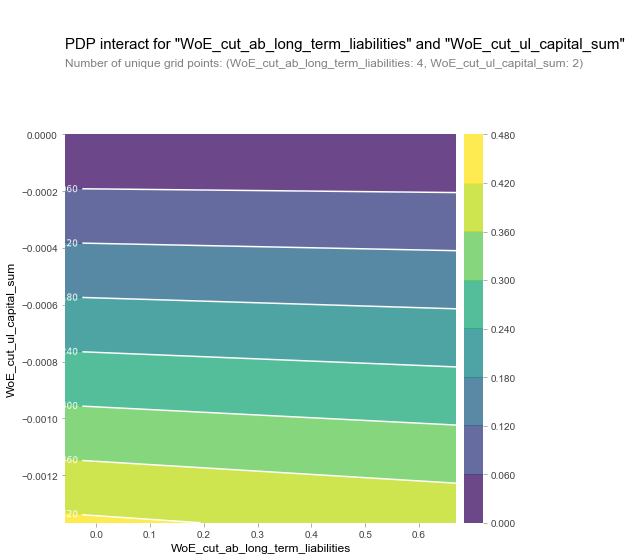

In [97]:
# Влияние двух признаков на предсказание
features_to_plot = ['WoE_cut_ab_long_term_liabilities', 'WoE_cut_ul_capital_sum']
inter1  =  pdp.pdp_interact(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

Из графика выше понятно, что при низких значениях суммы капитала по нашей модели компания имеет огромные шансы на объявление дефолта, причем даже не особо важно, каковы значения ее долгосрочных обязательств (делаем такой вывод,поскольку у нас получились "горизонтальные пласты").

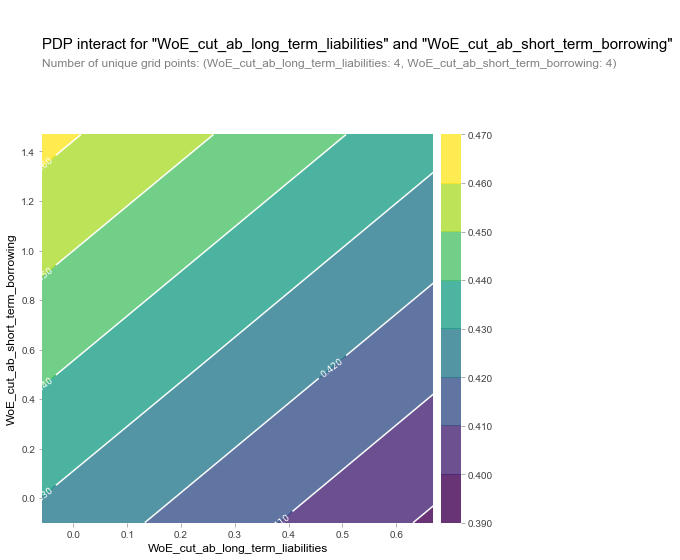

In [98]:
# Влияние двух признаков на предсказание
features_to_plot = ['WoE_cut_ab_long_term_liabilities', 'WoE_cut_ab_short_term_borrowing']
inter1  =  pdp.pdp_interact(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

По графику выше понятно, что чем больше наши краткосрочные заемные средства и чем меньше наши долгосрочные обязательства, тем выше вероятность объявления дефолта по нашей модели, что интересно и неочевидно. 

Также обратим внимание, что, в отличие от предыдущих PDP plots, здесь у нас на графике нигде не достигается вероятность 0, то есть никакая из комбинаций этих двух признаков не гарантирует нам стопроцентную уверенность в НЕобъявлении дефолта.

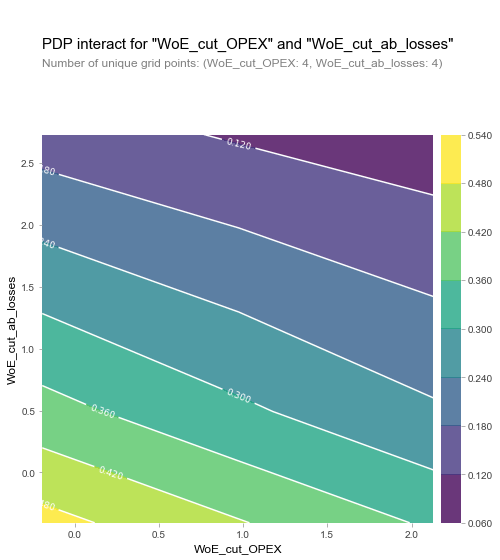

In [99]:
# Влияние двух признаков на предсказание
features_to_plot = ['WoE_cut_OPEX', 'WoE_cut_ab_losses']
inter1  =  pdp.pdp_interact(model=pipe_fin, dataset=X_train_fin.loc[:,top_feat_fin], model_features=features_fin, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

С помощью графика выше можно проанализировать влияние на таргет комбинации признаков нераспределенной прибыли и операционные расходы. Мы видим, что чем ниже нераспределенная прибыль и операционные расходы, тем выше вероятность дефолта, согласно нашей модели. Причем операционные расходы имеют более серьезное влияние на таргет.

## Выгрузка результата


In [100]:
answ_df = pd.DataFrame()
answ_df['id'] = df_fin_test_feature_complex_fillna['record_id']
answ_df['predict'] = preds_fin

In [101]:
answ_df.to_csv('PD-submit_final.csv',index=False, sep=';')

## Рекомендации и применение в бизнесе

В данном разделе мы выявим и проанализируем наиболее интересные бизнес-инсайты по данным, выведем свою собственную бизнес-метрику, с помощью которой можно оценить работу модели, построим скоринговую карту на основе нашей модели а также приведем экономическое обоснование модели.

### Бизнес-метрика

С целью интерпретации нашей модели для бизнеса и предложения потенциально полезных инсайтов по модели разработаем **бизнес-метрику**. С помощью данной бизнес-метрики можно будет оценить результат и качество работы модели с точки зрения бизнеса.

Для составления адекватной и содержательной бизнес-метрики, продумаем, какие факторы она должна учитывать и оценивать:

1.   Основная цель применения банками моделей предсказания дефолта компании -- это повышение доходности. Значит, формула нашей бизнес-метрики должна учитывать такой показатель как `Доходность`. Доходность от $i-$го кредита будем измерять по следующей формуле
\begin{eqnarray}
\mbox{Доходность}_i=\frac{\mbox{Сумма всех платежей по $i-$ому кредиту (в руб.)}}{\mbox{Выданная сумма $i-$го кредита (в руб.)}} - 1,
\end{eqnarray}
где $i$ - номер выданного кредита.

Пусть мы выдали $n$ кредитов. Тогда общая доходность по всем выданным нами кредитам:
\begin{eqnarray}
\mbox{Доходность}=\sum_{i=1}^n (\frac{\mbox{Сумма всех платежей по $i-$ому кредиту (в руб.)}}{\mbox{Выданная сумма $i-$го кредита (в руб.)}} -1).
\end{eqnarray}

Заметим, что показатель `Доходность` учитывает в себе те случаи, когда банк одобрил кредит компании, но она объявила дефолт через некоторое время. При максимизации `Доходности` мы как бы будем требовать не выдавать кредит компаниям, которые выдадут дефолт. 

`Доходность` покажет нам, как выплаченные кредиты покрывают невыплаченные кредиты.
<!-- При этом если мы решим просто максимизирвоать `Доходность`, то мы не особо учтем, что при объявлении дефолта компанией, которой банк выдал кредит, банк будет терять деньги. Так получается, потому что показатель `Доходность` "не наказывает" за объявление дефолта. -->

*Важное замечание:* если мы просто будем максимизировать `Доходность`, то мы получим, что мы просто НЕ будем выдавать кредиты компаниям, которые потенциально могут объявить дефолт по нашей модели. Это некорректно, потому что на самом деле мы можем просто одобрить таким компаниям меньшую сумму кредита или кредит на каких-то строгих условиях, а не отказывать им совсем. В связи с этим разумно добавить в будущую формулу нашей метрики следующий показатель.

2.  Рассмотрим показатель `Порог принятия`. Вычислять `Порог принятия` мы будем как
\begin{eqnarray}
\mbox{Порог принятия}=\frac{\mbox{Количество одобренных заявок на кредит (в шт.)}}{\mbox{Количество поступивших заявок на кредит (в шт.)}} \cdot \frac{1}{n}\sum_{i=1}^n \mbox{Сумма выданного кредита}_i.
\end{eqnarray}
Если при максимизации `Доходности` максимизировать еще и `Порог принятия`, то мы будем учитывать, что все-таки мы не хотим совсем строго отказывать всем, кому наша модель выдаст '0'. При этом за счет второго множителя (среднего значения суммы выданных нашим банком кредитов) мы будем учитывать еще и сумму, на которую мы выдаем кредит, чтобы не совсем терять потенциально прибыльных клиентов.

*Важное замечание:* отдельный показатель `Порог принятия` недостаточно корректен для нашей будущей бизнес-метрики, поскольку мы не учитываем следующий момент. Пусть к нам поступила заявка на кредит от классной потенциально прибыльной компании. По каким-то причинам (пользуясь финансовыми показателями по данной компании) мы одобрили не всю сумму из этой заявки, а только ее маленькую часть, чтобы не рисковать. Тогда, поскольку мы рассматриваем реальный мир, компания просто подаст заявку в другой банк и мы потеряем клиента и прибыль. Значит, нам нужно дополнительно "наказывать" нашу модель за нерациональную безрисковость. Для этого введем и учтем следующий показатель.

3. Введем показатель `Порог согласия` для того, чтобы наша будущая бизнес-метрика старалась не быть иррационально безрисковой и не терять прибыль
\begin{eqnarray}
\mbox{Порог согласия}=\frac{\mbox{Количество выданных кредитов (в шт.)}}{\mbox{Количество одобренных банком кредитов (в шт.)}}.
\end{eqnarray}
Чем больше `Порог согласия`, тем больше компаний согласились на условия кредита, предложенные нашим банком, то есть тем лучшие условия наш банк предложил клиентам. Будем максимизировать `Порог согласия`. 


**Результат:** максимизируя все три введенные нами показателя: `Доходность`, `Порог принятия`, `Порог согласия`, мы будем учитывать все основные важные для банка параметры: 


*   повышение прибыли от выдачи кредитов
*   уменьшение доли невыплаченных кредитов по отношению к выданным кредитам
*   получение максимальной выгоды от привлечения каждого из клиентов
*   избежание нерациональной, излишней безрисковости стратегии банка при одобрении заявок на кредиты

Собрать наши три показателя: `Доходность`, `Порог принятия`, `Порог согласия`, --  можно в следующую бизнес-метрику `ДПП` (которую нужно максимизировать):

\begin{eqnarray}
ДПП=c_1 \cdot \mbox{Доходность} + c_2 \cdot \mbox{Порог принятия} + c_3\cdot\mbox{Порог согласия},
\end{eqnarray}
где параметры $c_1$, $c_2$, $c_3$,  определяют вес каждого из наших трех показателей и выбираются банком в зависимости от его ключевых целей. Например, если основная стратегия банка допускает риск с целью получения максимальной прибыли, то банку стоит поставить высокое значение параметра $c_3$, чтобы `Порог согласия`, отвечающий за рискованность стратегии, имел больший вклад в метрику `ДПП` и соответственно больше влиял на ее значение.


### Скоринговая карта

Мы вылели только некоторые признаки, чтобы было удобнее отобразить, но рассчитали для всех, если это будет необходимо можно вывести на печать все 

$\begin{eqnarray}\text{Скоринговоый балл в линейном масштабе j-итого признака} = -(WOE_{j}*b_{j}+\frac{b_{0}}{n})*R+\frac{A}{n}\end{eqnarray}$ 

где WOEj — значение WOE для каждой j-ой категории сгруппированной переменной, n — количество независимых переменных в уравнении регрессии, b0 — константа, bi — коэффициент регрессии для i-ой переменной.

In [102]:
scoring_map(pipe_fin.best_estimator_['log'],top_feat_fin,frame_for_scoring_map)

,value,WoE_cut_ogrn_age,scoring_points
16,"(-0.149, 8.765]",-1.124536,-11.967428
11,"(8.765, 17.529]",-1.021783,-8.746779
3,"(17.529, 26.294]",-0.685358,1.797949
1,"(26.294, 35.059]",-0.675526,2.106103
7,"(35.059, 43.824]",-0.404164,10.611519
4,"(43.824, 52.588]",-0.436667,9.592765
8,"(52.588, 61.353]",-0.029150,22.365772
15,"(61.353, 70.118]",0.127067,27.262155
6,"(70.118, 78.882]",-0.005491,23.107312
12,"(78.882, 87.647]",0.179832,28.915990


,value,WoE_cut_ul_staff_range,scoring_points
1,"(-0.002, 0.118]",1.443755,33.744529
2,"(0.941, 1.059]",1.608394,34.937915
0,"(1.882, 2.0]",-0.083235,22.676103


,value,WoE_cut_frac_comer_exp,scoring_points
0,"(-0.001, 0.0588]",-0.033621,22.978285
1,"(0.0588, 0.118]",1.150354,33.583331
4,"(0.118, 0.176]",0.944547,31.739886
3,"(0.176, 0.235]",0.901062,31.350383
5,"(0.235, 0.294]",0.564590,28.336550
6,"(0.294, 0.353]",1.316006,35.067098
9,"(0.353, 0.412]",0.086554,24.054711
8,"(0.412, 0.471]",-0.015229,23.143028
7,"(0.471, 0.529]",0.523768,27.970901
12,"(0.529, 0.588]",-0.256391,20.982902


### Бизнес-инсайты по данным

##### Current Ratio

Известно, что наш признак **Current Ratio**  часто применяется в оценке текущего финансового положения организации, опасности выдачи ей краткосрочных займов. В РФ существует следующий норматив деления компаний по категориям в зависимости от их значений **Current Ratio**:

Значение Current Ratio | Норматив
--- | --- 
CR < 1.5 | Критическая платежеспособность
1.5 < CR <=2 | Низкая платежеспособность
2 < CR <=3 | Удовлетворительная платежеспособность
3 < CR  | Высокая платежеспособность (Нерациональная структура капитала)

Присвоим каждому объекту в нашей выборке с финансовой отчетностью соответствующую ему категорию **Current Ratio**.


In [103]:
df_gr_cr = df_graphs_fin_train.copy()
df_gr_cr['current_ratio_category'] = 'critical'
df_gr_cr.loc[(df_gr_cr['current_ratio'] > 1.5) & (df_gr_cr['current_ratio'] <= 2), 'current_ratio_category'] = 'low'
df_gr_cr.loc[(df_gr_cr['current_ratio'] > 2) & (df_gr_cr['current_ratio'] <= 3), 'current_ratio_category'] = 'satisfying'
df_gr_cr.loc[(df_gr_cr['current_ratio'] > 3), 'current_ratio_category'] = 'irrational'

Посмотрим, какие категории компаний чаще представлены в нашей выборке:

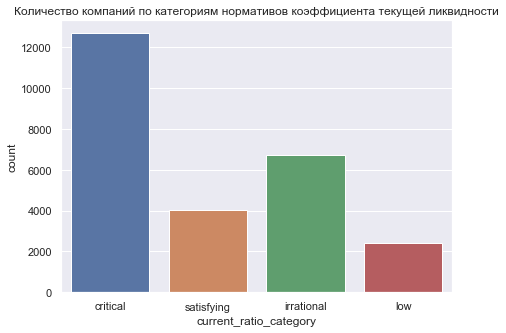

In [104]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(x="current_ratio_category", 
                   data=df_gr_cr).set_title('Количество компаний по категориям нормативов коэффициента текущей ликвидности')
plt.rcParams["axes.labelsize"] = 12

Заметим, что наибольшее количество компаний, по которым у нас есть информация, имеют критически низкую платежеспособность и являются потенциальными кандидатами на объявление дефолта. 

Интересная деталь: у нас также достаточно много компаний с иррационально высоким значением Current Ratio. То есть у нас много как компаний, очень склонных к объявлению дефолта, так и компаний, совсем не склонных к дефолту.


Коэффициент **Current Ratio** может зависеть от многих факторов, в том числе он может быть связан с возрастом компании. Рассмотрим связь двух признаков: **Current Ratio** и **ogrn_age**, - с целевой переменной **default_12m**:

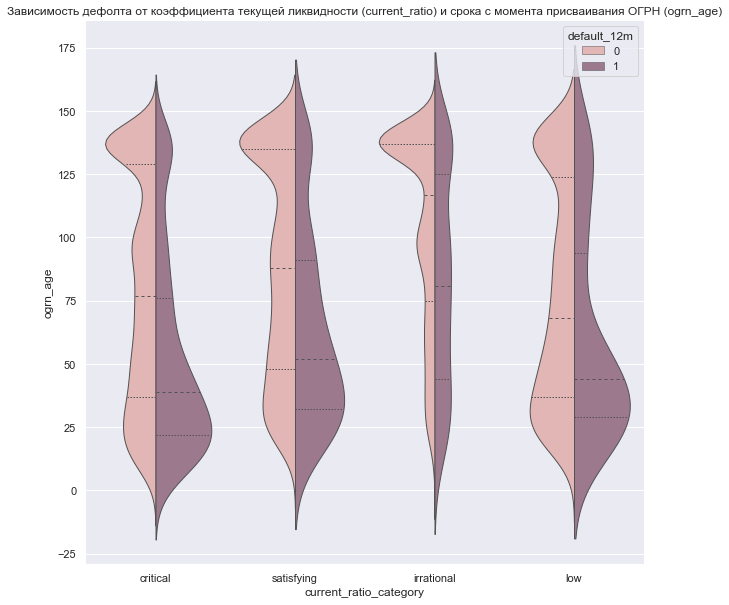

In [105]:
sns.set(rc={'figure.figsize':(10,10)})
sns.violinplot(data=df_gr_cr, x="current_ratio_category", y="ogrn_age", hue="default_12m",
               split=True, inner="quart", linewidth=1,
               palette={0: '#EAAFAF', 1: '#A2738C'}
).set_title('Зависимость дефолта от коэффициента текущей ликвидности (current_ratio) и срока с момента присваивания ОГРН (ogrn_age)')
sns.despine(left=True)

Обратим внимание на следующие интересные факты:


1.   Во всех 4 категориях нормативов **Current Ratio** при возрасте 125-150 лет наблюдается очень большое количество компаний, которые НЕ объявляли дефолт, и очень маленькое количество компаний, которые объявили дефолт.
2.   Чаще всего дефолт объявляют компании с критически низким и просто низким уровнем **Current Ratio**, причем именно молодые. Старые компании с критически низким уровнем платежеспособности объявляют дефолт не чаще, чем компании с другими категориями **Current Ratio**.
3. Компании  с критически низким уровнем **Current Ratio** характеризуются самой большой нестабильностью таргета (много компаний, которые объявили дефолт; много компаний, которые не объявили дефолт).
4. Удивительно, но компании с удовлетворительным уровнем **Current Ratio** объявляют дефолт не реже, чем компании с другими уровнями **Current Ratio**, даже более плохими. Это замечание подтверждает нашу гипотезу на уровне отбора признаков, что `current_ratio` не является особо значимым признаком.



##### Debt ratio

**Debt Ratio** (коэффициент финансовой зависимости) характеризует отношение заемного капитала организации ко всему капиталу. Данный коэффициент относится к группе показателей, описывающих структуру капитала организации. В РФ существует следующий норматив для разделения компаний по категориям, согласно их значению **Debt Ratio**: 

Значение Debt Ratio | Норматив
--- | --- 
DR <= 0.4 | Иррациональная зависимость (упущенные возможности, слишком осторожный подход)
0.4 < DR <=0.6 | Оптимальная зависимость
0.6 < DR <=0.75 | Нормальная зависимость
0.75 < DR  | Слишком высокая зависимость (от кредиторов)

Присвоим каждому объекту в нашей выборке с финансовой отчетностью соответствующую ему категорию **Debt Ratio**.


In [106]:
df_gr_dr = df_graphs_fin_train.copy()
df_gr_dr['Debt_ratio_category'] = 'irrational'
df_gr_dr.loc[(df_gr_dr['Debt_ratio_betters'] > 0.4) & (df_gr_dr['Debt_ratio_betters'] <= 0.6), 'Debt_ratio_category'] = 'optimal'
df_gr_dr.loc[(df_gr_dr['Debt_ratio_betters'] > 0.6) & (df_gr_dr['Debt_ratio_betters'] <= 0.75), 'Debt_ratio_category'] = 'normal'
df_gr_dr.loc[(df_gr_dr['Debt_ratio_betters'] > 0.75), 'Debt_ratio_category'] = 'too big'

Посмотрим, какие категории компаний чаще представлены в нашей выборке:

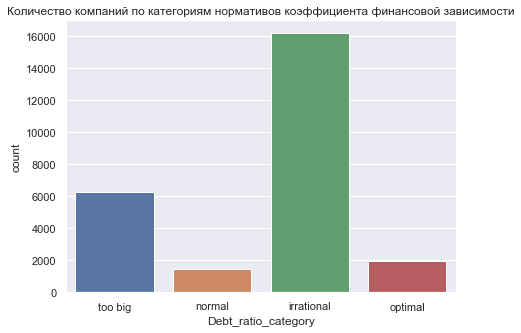

In [107]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(x="Debt_ratio_category", 
                   data=df_gr_dr).set_title('Количество компаний по категориям нормативов коэффициента финансовой зависимости')
plt.rcParams["axes.labelsize"] = 12

Заметим, что примерно 80% наших компаний относятся к категории irrational по признаку **Debt ratio**, то есть компании слишком осторожно подходят к привлечению заемного капитала и, может быть, упускают возможности повысить рентабельность собственного капитала.

Интересное замечание: наши компании осторожно подходят к привлечению заемного капитала. При этом вспомним, что у нас много компаний с очень высоким уровнем **Current Ratio** (текущей ликвидности). Делаем вывод, что **в нашей выборке в целом много очень осторожных компаний.**

Мы поняли, что показатель **OPEX** (операционные расходы) достаточно сильно влияет на объявление дефолта. Давайте посмотрим на связь **Debt ratio** с операционными расходами, а также на связь **current_ratio** с операционными расходами:

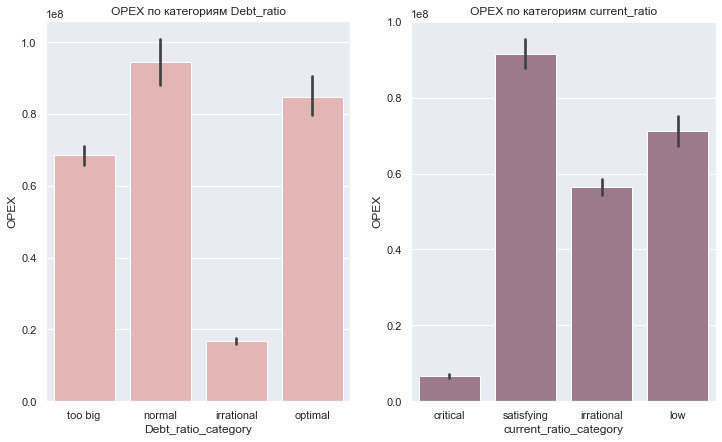

In [108]:
sns.set(rc={'figure.figsize':(12,7)})

fig, ax =plt.subplots(1,2)


sns.set_color_codes("muted")
sns.barplot(x="Debt_ratio_category", y="OPEX", data=df_gr_dr,
            color='#EAAFAF', ax=ax[0]).set_title('OPEX по категориям Debt_ratio')

sns.set_color_codes("muted")
sns.barplot(x="current_ratio_category", y="OPEX", data=df_gr_cr,
            color='#A2738C', ax=ax[1]).set_title('OPEX по категориям current_ratio')

fig.show()

Заметим, что самые высокие операционные расходы - у компаний с нормальным уровнем коэффициента финансовой зависимости и удовлетворительным коэффициентом текущей ликвидности; самые низкие операционные расходы - у компаний с иррационально маленьким коэффициентом финансовой зависимости и критически низким коэффициентом текущей ликвидности, что в целом неудивительно.

Интересной особенностью нашей выборки является то, что примерно одинаковые операционные расходы имеют компании с иррационально высокой текущей ликвидностью и с низкой текущей ликвидностью.



Давайте посмотрим на распределение признака **OPEX** (операционные расходы) 

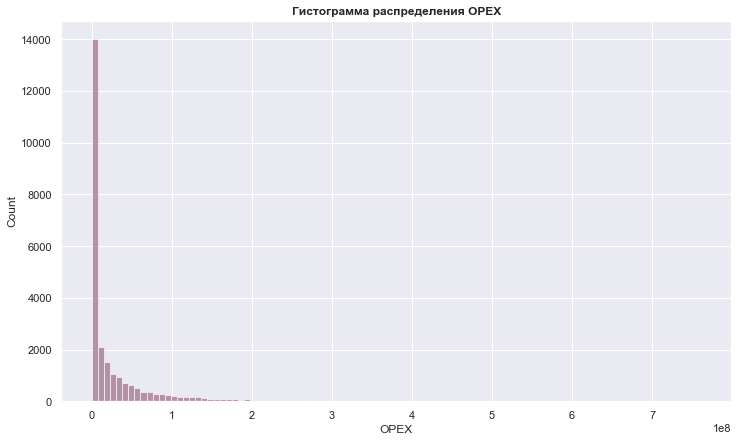

In [109]:
plot = sns.histplot(data=df_graphs_fin_train, x='OPEX', bins=100, color='#A2738C').set_title('Гистограмма распределения OPEX',
          fontweight ="bold")
sns.set(rc={'figure.figsize':(15,12)})
plt.rcParams["axes.labelsize"] = 12

plt.show()

Распределение похоже на логнормальное, то есть у нас больше всего объектов с низкими операционными расходами, гораздо меньше - с высокими операционными расходами.

##### Net Margin

Чистая рентабельность, то есть доля прибыли, которую бизнес получает за каждый заработанный рубль, используется, чтобы дать аналитическое представление о финансовой устойчивости компании. Посмотрим на значения этого показателя по нашей выборке.

Чистая рентабельность по логике может быть связана со сроком с момента установки капитала, поэтому посмотрим влияние именно пары этих признаков (`cap_actual_age` и `Net_margin`) на таргет `default_12m`:

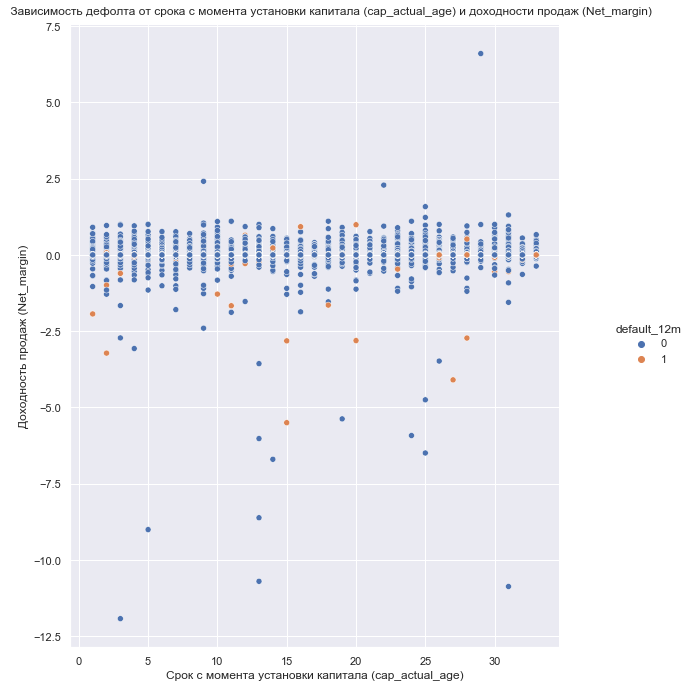

In [110]:
df_gr_ba = df_graphs_fin_train[ (df_graphs_fin_train['Net_margin'] > -15)]
plot = sns.relplot(data=df_gr_ba, x="cap_actual_age", y="Net_margin", hue='default_12m')

plot.fig.suptitle(' Зависимость дефолта от срока с момента установки капитала (cap_actual_age) и доходности продаж (Net_margin)',
                  fontsize=12, fontdict={"weight": "bold"})

plot.set(xlabel='Срок с момента установки капитала (cap_actual_age)', ylabel='Доходность продаж (Net_margin)')

plot.fig.set_size_inches(10,10)
plt.rcParams["axes.labelsize"] = 12

plt.show()

Заметим, что хотя чаще всего дефолт объявляют компании с отрицательной доходностью, но все-таки есть и примеры объявивших дефолт компаний с положительной и даже относительно высокой доходностью продаж. Причем объявившие дефолт компании с положительной `Net_margin` в большинстве своем имеют достаточно большой срок с момента установки капитала, примерно 15 и больше, что является интересным фактом. 

Также обратим внимание, что много компаний объявляют дефолт при минимальном сроке с момента установки капитала, что соотносится с реальностью и логикой.

Посмотрим, как влияет срок с момента установки капитала (cap_actual_age) на текущую ликвидность (current_ratio):

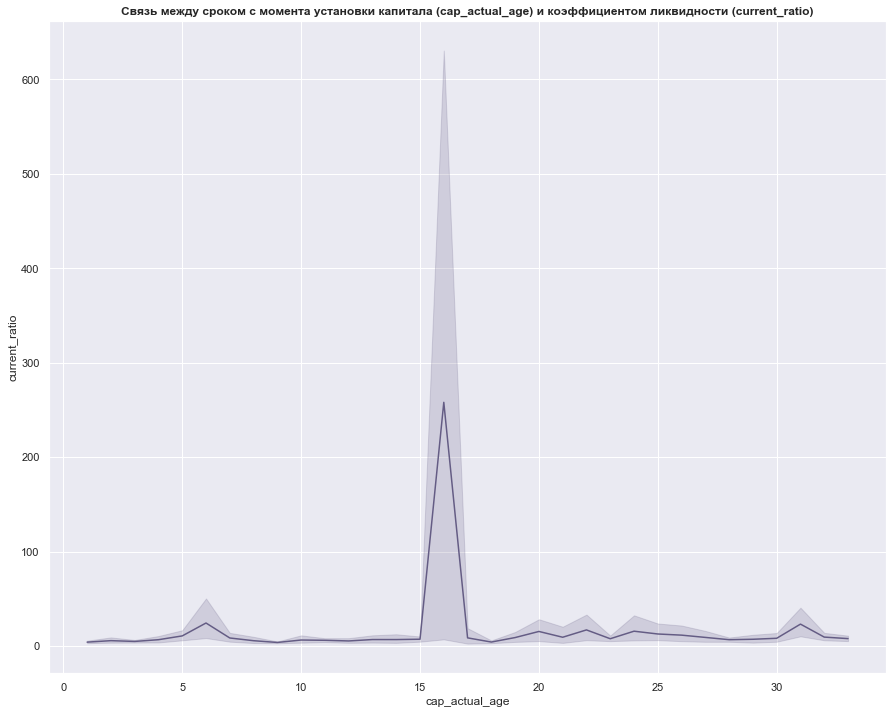

In [111]:
df_gr_ba_cr = df_graphs_fin_train[(df_graphs_fin_train["cap_actual_age"] > 0) & (df_graphs_fin_train["cap_actual_age"] < 300)]
sns.lineplot(data=df_gr_ba_cr, x="cap_actual_age", y="current_ratio", color='#645C84').set_title('Связь между сроком с момента установки капитала (cap_actual_age) и коэффициентом ликвидности (current_ratio)',
          fontweight ="bold")

plt.show()

График получается интересным. Видим, что самая высокая текущая ликвидность - на уровне примерно 16 лет с момента установки капитала. Наблюдается действительно резки скачок. То есть интересный инсайт: примерно в этот срок после установки капитала компании обладают значительно большим размером активов, которые могут быстро превратиться в деньги.

Также рассмотрим график влияния пары признаков (Процентная ставка, под которую в компании работают средства акционеров (ROE); Доходность продаж (Net_margin)) на таргет default_12m. Мы рассматриваем именно такую пару признаков, потому что это потенциально интересный разрез.

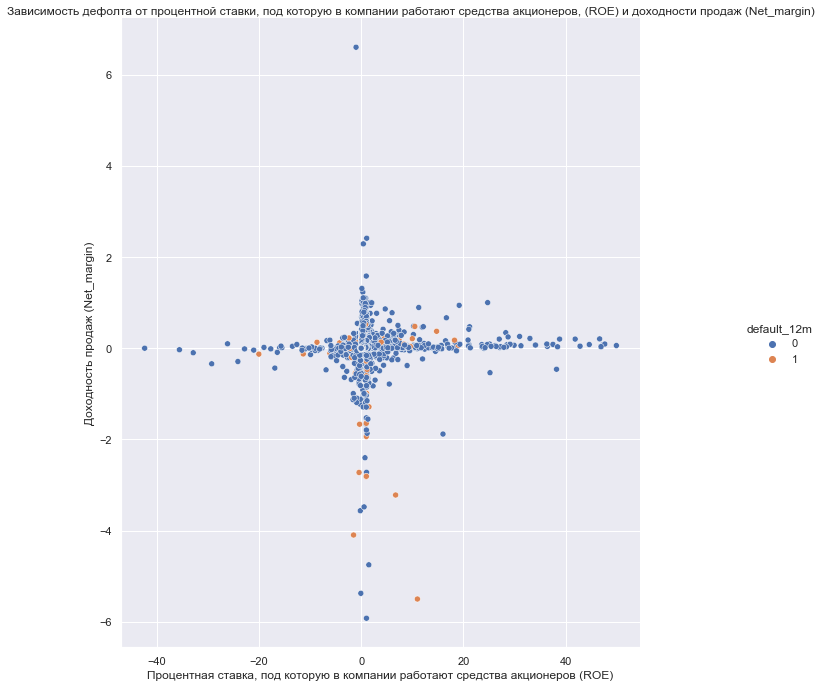

In [112]:
df_gr_roe_nm = df_graphs_fin_train[(df_graphs_fin_train['ROE'] > -50) & (df_graphs_fin_train['ROE'] < 50) & (df_graphs_fin_train['Net_margin'] > -6) ]
plot = sns.relplot(data=df_gr_roe_nm, x="ROE", y="Net_margin", hue='default_12m')

plot.fig.suptitle('Зависимость дефолта от процентной ставки, под которую в компании работают средства акционеров, (ROE) и доходности продаж (Net_margin)',
                  fontsize=12, fontdict={"weight": "bold"})

plot.set(xlabel='Процентная ставка, под которую в компании работают средства акционеров (ROE)', ylabel='Доходность продаж (Net_margin)')

plot.fig.set_size_inches(10,10)
plt.rcParams["axes.labelsize"] = 12

plt.show()

Заметим, что чаще всего дефолт объявляют компании либо с близкой к нулю доходностью продаж и произвольным значением ROE, либо с близким к нулю значением ROE и произвольной отрицательной доходностью продаж.

Можно скзаать, что дефолт почти не объявляется компаниями с очень высокой или очень низкой процентной ставкой, под которую в компании работают средства акционеров (ROE).

### Экономическое обоснование модели

Для банка очень важна прибыль, которую он получает от выдачи кредитов. Поэтому рассчитаем доходность банка в зависимости от порога модели. Если мы хотим посчитать ожидаемые убытки, то нужно применить следующую формулу:

$ \begin{eqnarray} \text{Expected loss} = \text{Probability of default} \times \text{Exposure at default} \times \text{Loss given default}\end{eqnarray}$

Но мы решили не минимизировать убытки, а максимизировать прибыль, чтобы рассчитать прибыль и убытки при классификации объекта:
- Если мы правильно классифицировали отсутсвие дефолта у клиента, то прибыль банка составит: $\begin{eqnarray}\text{Ставка, под которую был выдан кредит (r)} \times \text{сумма кредитования (Debt)}\end{eqnarray}$  
- Если мы неправильно классифицировали отсутсвие дефолта у клиента, то убытки банка составят: $\begin{eqnarray}\text{Убытки возникшие в результате дефолта (LGD)} \times \text{сумма кредитования (Debt)}\end{eqnarray}$
тогда итоговая формула прибыли банка равна:

$\begin{eqnarray}\text{Benefit} = \text{Количество правильно классифицированных нулей} \times (r \times Debt) - \text{Количество неправильно классифицированных нулей} \times (LGD \times Debt)\end{eqnarray}$

gini 0.36
max benefit 132945.39000000004
best_threshold 0.4623115577889447


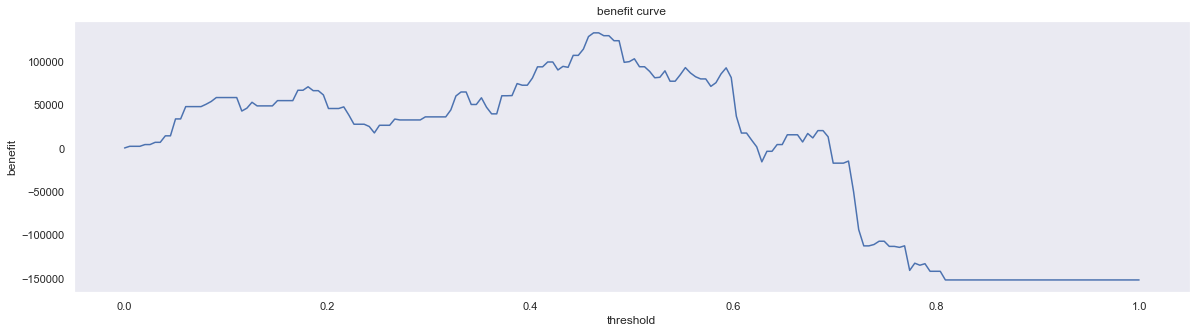

In [113]:
np.random.seed(1)
# Сгенерируем сумму кредита
debt = np.random.randint(10000,50000, size=200)
# Сгенерируем LGD
lgd = np.around(np.random.uniform(0.1, 0.4,200),1)
# Построим зависимость прибыли от порога
benefit_plot(X_valid_fin,y_valid_fin,
                     pipe_fin.predict_proba(X_valid_fin.loc[:,top_feat_fin])[:,1],200,debt,
                     r=0.17,lgd=lgd)

### Выводы и рекомендации

- Как мы можем наблюдать, максимальная прибыль достигается при пороге 0.462. Поэтому чтобы сделать модель более полезной именно для бизнеса стоит установить именно этот порог.
- Чтобы получить максимальную долю верных ответов стоит установить порог равный 0.539
- Так же модель можно усовершенствовать разделив выборку на объекты с финансовой отчетностью и без нее. И обучить на основе каждой свою модель. Это более корректно, ибо объекты без финансовой отчетности это не ощибка заполнения, а следствие порядка подачи информации для запроса на кредитование. До какого то момента мы именно так и делали, но такой результат давал очень низкое значение метрики на тесте порядка 0.53 (что не очень далеко от случайного угадываняия). Поэтому конкретно на этой выборке мы отказались от этого метода в пользу заполнения фин отчетности 0, что дало нам рост метрики до 0.65

